# Telecom Customer Churn
Churn data for a fictional Telecommunications company that provides phone and internet services to 7,043 customers in California, and includes details about customer demographics, location, services, and current status.

### Recommended Analysis
1. How many customers joined the company during the last quarter?

2. What is the customer profile for a customer that churned, joined, and stayed? Are they different?

3. What seem to be the key drivers of customer churn?

4. Is the company losing high value customers? If so, how can they retain them?

# Preparing the Data

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns


In [2]:
data_dict = pd.read_csv('telecom_data_dictionary.csv')
data_dict

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customer�s gender: Male, Female"
2,Customer Churn,Age,"The customer�s current age, in years, at the t..."
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,Indicates the number of dependents that live w...
5,Customer Churn,City,The city of the customer�s primary residence i...
6,Customer Churn,Zip Code,The zip code of the customer�s primary residence
7,Customer Churn,Latitude,The latitude of the customer�s primary residence
8,Customer Churn,Longitude,The longitude of the customer�s primary residence
9,Customer Churn,Number of Referrals,Indicates the number of times the customer has...


In [3]:
df = pd.read_csv('telecom_customer_churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [5]:
df.isnull().sum().sort_values(ascending=False)

Churn Reason                         5174
Churn Category                       5174
Internet Type                        1526
Unlimited Data                       1526
Streaming Music                      1526
Streaming Movies                     1526
Streaming TV                         1526
Premium Tech Support                 1526
Device Protection Plan               1526
Online Security                      1526
Avg Monthly GB Download              1526
Online Backup                        1526
Multiple Lines                        682
Avg Monthly Long Distance Charges     682
Phone Service                           0
Contract                                0
Age                                     0
Customer Status                         0
Total Revenue                           0
Total Long Distance Charges             0
Total Extra Data Charges                0
Total Refunds                           0
Total Charges                           0
Monthly Charge                    

In [6]:
df.duplicated().sum()

0

## Handling missing values

In [7]:
# fill na : Avg Monthly Long Distance Charges = mean
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean())

# fill na : Multiple Lines = 'No'
df['Multiple Lines'] = df['Multiple Lines'].fillna('No')

# fill na : Internet Type = 'None'
df['Internet Type'] = df['Internet Type'].fillna('None')

# fill na : Avg Monthly GB Download = mean
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].fillna(df['Avg Monthly GB Download'].mean())

# fill na : Online Security = 'No'
df['Online Security'] = df['Online Security'].fillna('No')

# fill na : Online Backup = 'No'
df['Online Backup'] = df['Online Backup'].fillna('No')

# fill na : Device Protection Plan = 'No'
df['Device Protection Plan'] = df['Device Protection Plan'].fillna('No')

# fill na : Premium Tech Support = 'No'
df['Premium Tech Support'] = df['Premium Tech Support'].fillna('No')

# fill na : Streaming TV = 'No'
df['Streaming TV'] = df['Streaming TV'].fillna('No')

# fill na : Streaming Movies = 'No'
df['Streaming Movies'] = df['Streaming Movies'].fillna('No')

# fill na : Streaming Music = 'No'
df['Streaming Music'] = df['Streaming Music'].fillna('No')

# fill na : Unlimited Data = 'No'
df['Unlimited Data'] = df['Unlimited Data'].fillna('No')

# fill na : Churn Category = 'Other'
df['Churn Category'] = df['Churn Category'].fillna('Other')

# fill na : Churn Reason = 'Not stated'
df['Churn Reason'] = df['Churn Reason'].fillna('Not stated')


In [8]:
df.isnull().sum().sort_values(ascending=False)

Customer ID                          0
Payment Method                       0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Monthly Charge                       0
Gender                               0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Customer Status                      0
Churn Category                       0
Device Protection Plan               0
Online Backup                        0
Online Security                      0
Avg Monthly GB Download              0
Age                                  0
Married                              0
Number of Dependents                 0
City                     

# Data Analysis

In [9]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,13.495231,17.334960,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,14.455000,15.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.420517,26.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


<AxesSubplot:xlabel='Contract', ylabel='Count'>

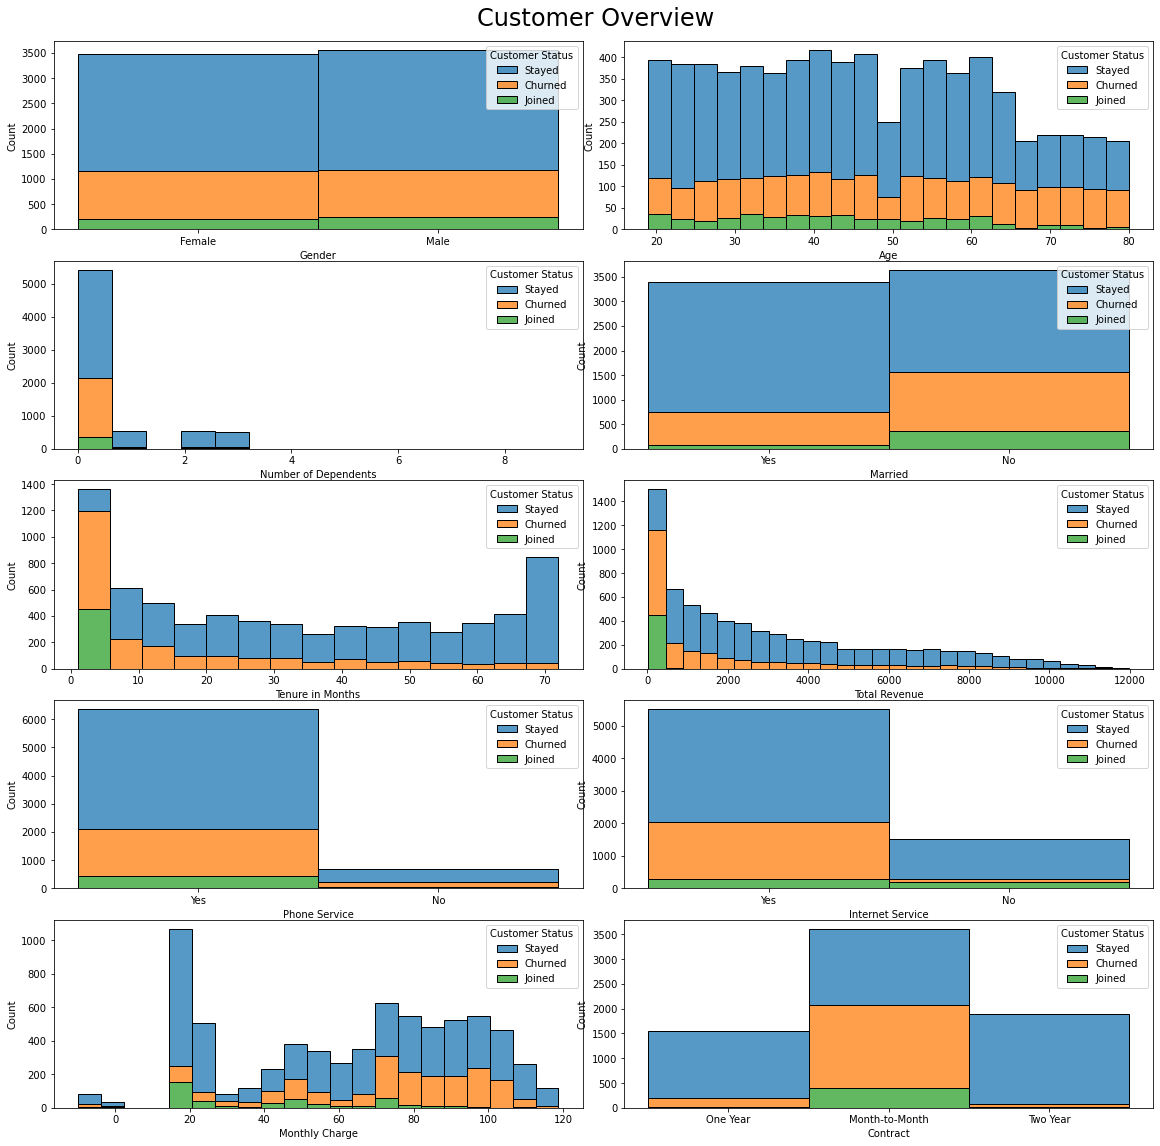

In [10]:
fig, ax = plt.subplots(5,2, figsize=(16,16))
plt.suptitle('Customer Overview',fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

sns.histplot(df, x="Gender", hue="Customer Status", multiple="stack", ax=ax[0,0])
sns.histplot(df, x="Age", hue="Customer Status", multiple="stack", ax=ax[0,1])
sns.histplot(df, x="Number of Dependents", hue="Customer Status", multiple="stack", ax=ax[1,0])
sns.histplot(df, x="Married", hue="Customer Status", multiple="stack", ax=ax[1,1])
sns.histplot(df, x="Tenure in Months", hue="Customer Status", multiple="stack", ax=ax[2,0])
sns.histplot(df, x="Total Revenue", hue="Customer Status", multiple="stack", ax=ax[2,1])
sns.histplot(df, x="Phone Service", hue="Customer Status", multiple="stack", ax=ax[3,0])
sns.histplot(df, x="Internet Service", hue="Customer Status", multiple="stack", ax=ax[3,1])
sns.histplot(df, x="Monthly Charge", hue="Customer Status", multiple="stack", ax=ax[4,0])
sns.histplot(df, x="Contract", hue="Customer Status", multiple="stack", ax=ax[4,1])

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64


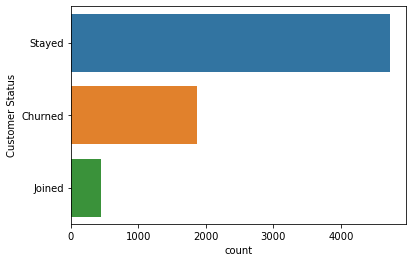

In [11]:
print(df['Customer Status'].value_counts())

sns.countplot(y="Customer Status",data=df)
plt.show()

Other              5356
Competitor          841
Dissatisfaction     321
Attitude            314
Price               211
Name: Churn Category, dtype: int64


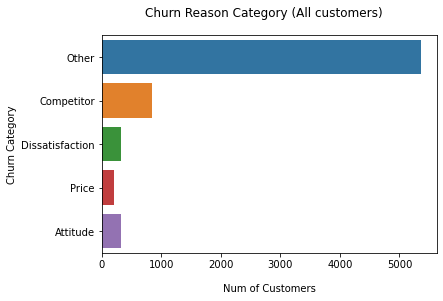

In [12]:
print(df['Churn Category'].value_counts())

sns.countplot(y="Churn Category",data=df)
plt.suptitle("Churn Reason Category (All customers)")
plt.xlabel("Num of Customers", labelpad=14)
plt.show()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn Reason, 

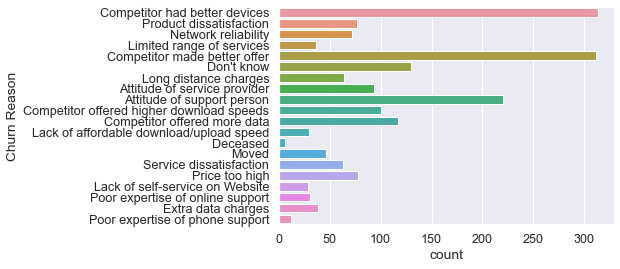

In [38]:
reasons = df['Churn Reason'].replace({'Not stated' : np.nan})     # hide the 'Not stated' reason as it becomes irrelevant

print(reasons.value_counts())

sns.countplot(y="Churn Reason",data=df)
plt.show()

In [14]:
df1 = df.copy()
df1.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [15]:
df1 = df1.drop(['Customer ID', 'City', 'Married',
       'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Paperless Billing'],axis=1)

In [16]:
df1.head()

,Gender,Age,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,0,9,None,Yes,42.39,No,Yes,Cable,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Other,Not stated
1,Male,46,0,9,None,Yes,10.69,Yes,Yes,Cable,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Other,Not stated
2,Male,50,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,0,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,0,3,None,Yes,7.38,No,Yes,Fiber Optic,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [17]:
df1.columns

Index(['Gender', 'Age', 'Number of Dependents', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

Assume that customers categorized as "joined" are staying at the moment. so, we make dummy values
- Churned as 1
- Stayed as 0

In [18]:
df1['Customer Status'] = df1['Customer Status'].replace({'Churned': 1, 'Stayed': 0, 'Joined' : 0})


In [19]:
df1.head()

,Gender,Age,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,0,9,None,Yes,42.39,No,Yes,Cable,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0,Other,Not stated
1,Male,46,0,9,None,Yes,10.69,Yes,Yes,Cable,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0,Other,Not stated
2,Male,50,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1,Competitor,Competitor had better devices
3,Male,78,0,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1,Dissatisfaction,Product dissatisfaction
4,Female,75,0,3,None,Yes,7.38,No,Yes,Fiber Optic,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1,Dissatisfaction,Network reliability


Having the new dataframe, begin plotting proportions of churned customers and those who are not (yet)

Text(0.5, 1.0, 'Customer Status Per Category')

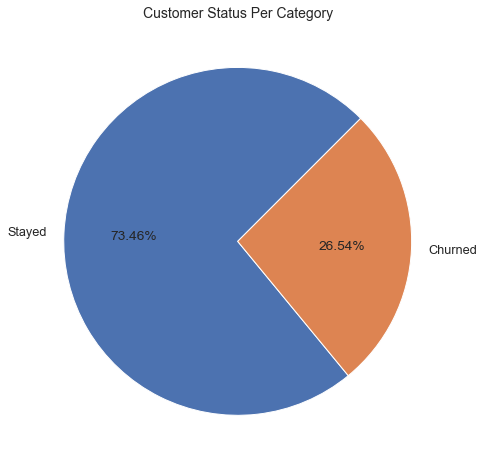

In [33]:
status = df1['Customer Status'].replace({1 : 'Churned', 0 : 'Stayed'}).unique()

df1['Customer Status'].value_counts().plot(kind='pie', figsize=(10, 8), labels=(status), autopct='%.2f%%', startangle=45)



plt.ylabel("")
plt.title("Customer Status Per Category", size=14)

In [21]:
print('Customers who stayed are', round(df1['Customer Status'].value_counts()[0]/len(df1) * 100,2), '% of the dataset')
print('Customers who churned are', round(df1['Customer Status'].value_counts()[1]/len(df1) * 100,2), '% of the dataset')

Customers who stayed are 73.46 % of the dataset
Customers who churned are 26.54 % of the dataset


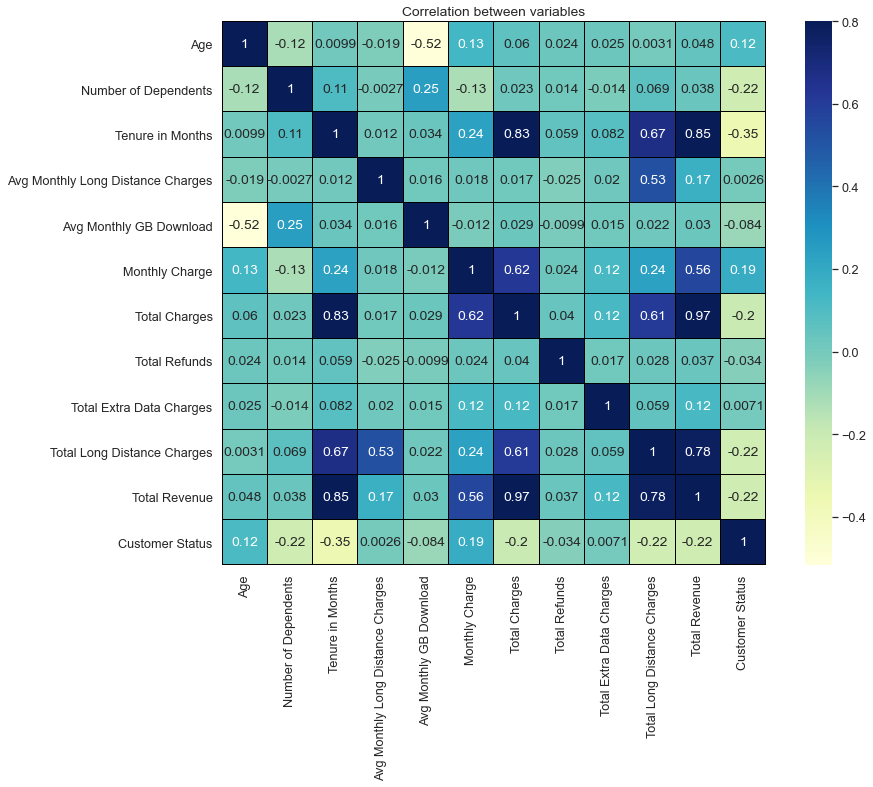

In [22]:
corr=df1.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between variables');

The correlation plot shows that there is no (numeric) variable that drives customers to churn,
however there are variables which have stronger correlation than the others, such as:
- Monthly Charge
- Age
- Total Extra Data Charges
- Avg Monthly Long Distance Charges

## Churned Customers

In [23]:
churn_df = pd.DataFrame((df1[df1['Customer Status'] == 1]))

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7039
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1869 non-null   object 
 1   Age                                1869 non-null   int64  
 2   Number of Dependents               1869 non-null   int64  
 3   Tenure in Months                   1869 non-null   int64  
 4   Offer                              1869 non-null   object 
 5   Phone Service                      1869 non-null   object 
 6   Avg Monthly Long Distance Charges  1869 non-null   float64
 7   Multiple Lines                     1869 non-null   object 
 8   Internet Service                   1869 non-null   object 
 9   Internet Type                      1869 non-null   object 
 10  Avg Monthly GB Download            1869 non-null   float64
 11  Online Security                    1869 non-null   objec

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Count'>

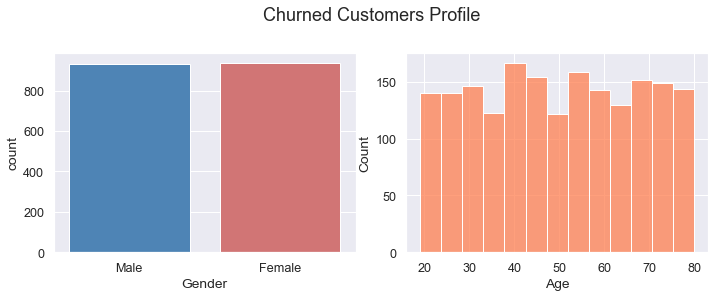

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.suptitle('Churned Customers Profile',fontsize=18)
fig.tight_layout()


sns.countplot(churn_df['Gender'], ax=ax[0], palette=['#3d85c6', '#e06666']) 
sns.histplot(churn_df['Age'], ax=ax[1], color='coral')

<AxesSubplot:xlabel='Offer', ylabel='Count'>

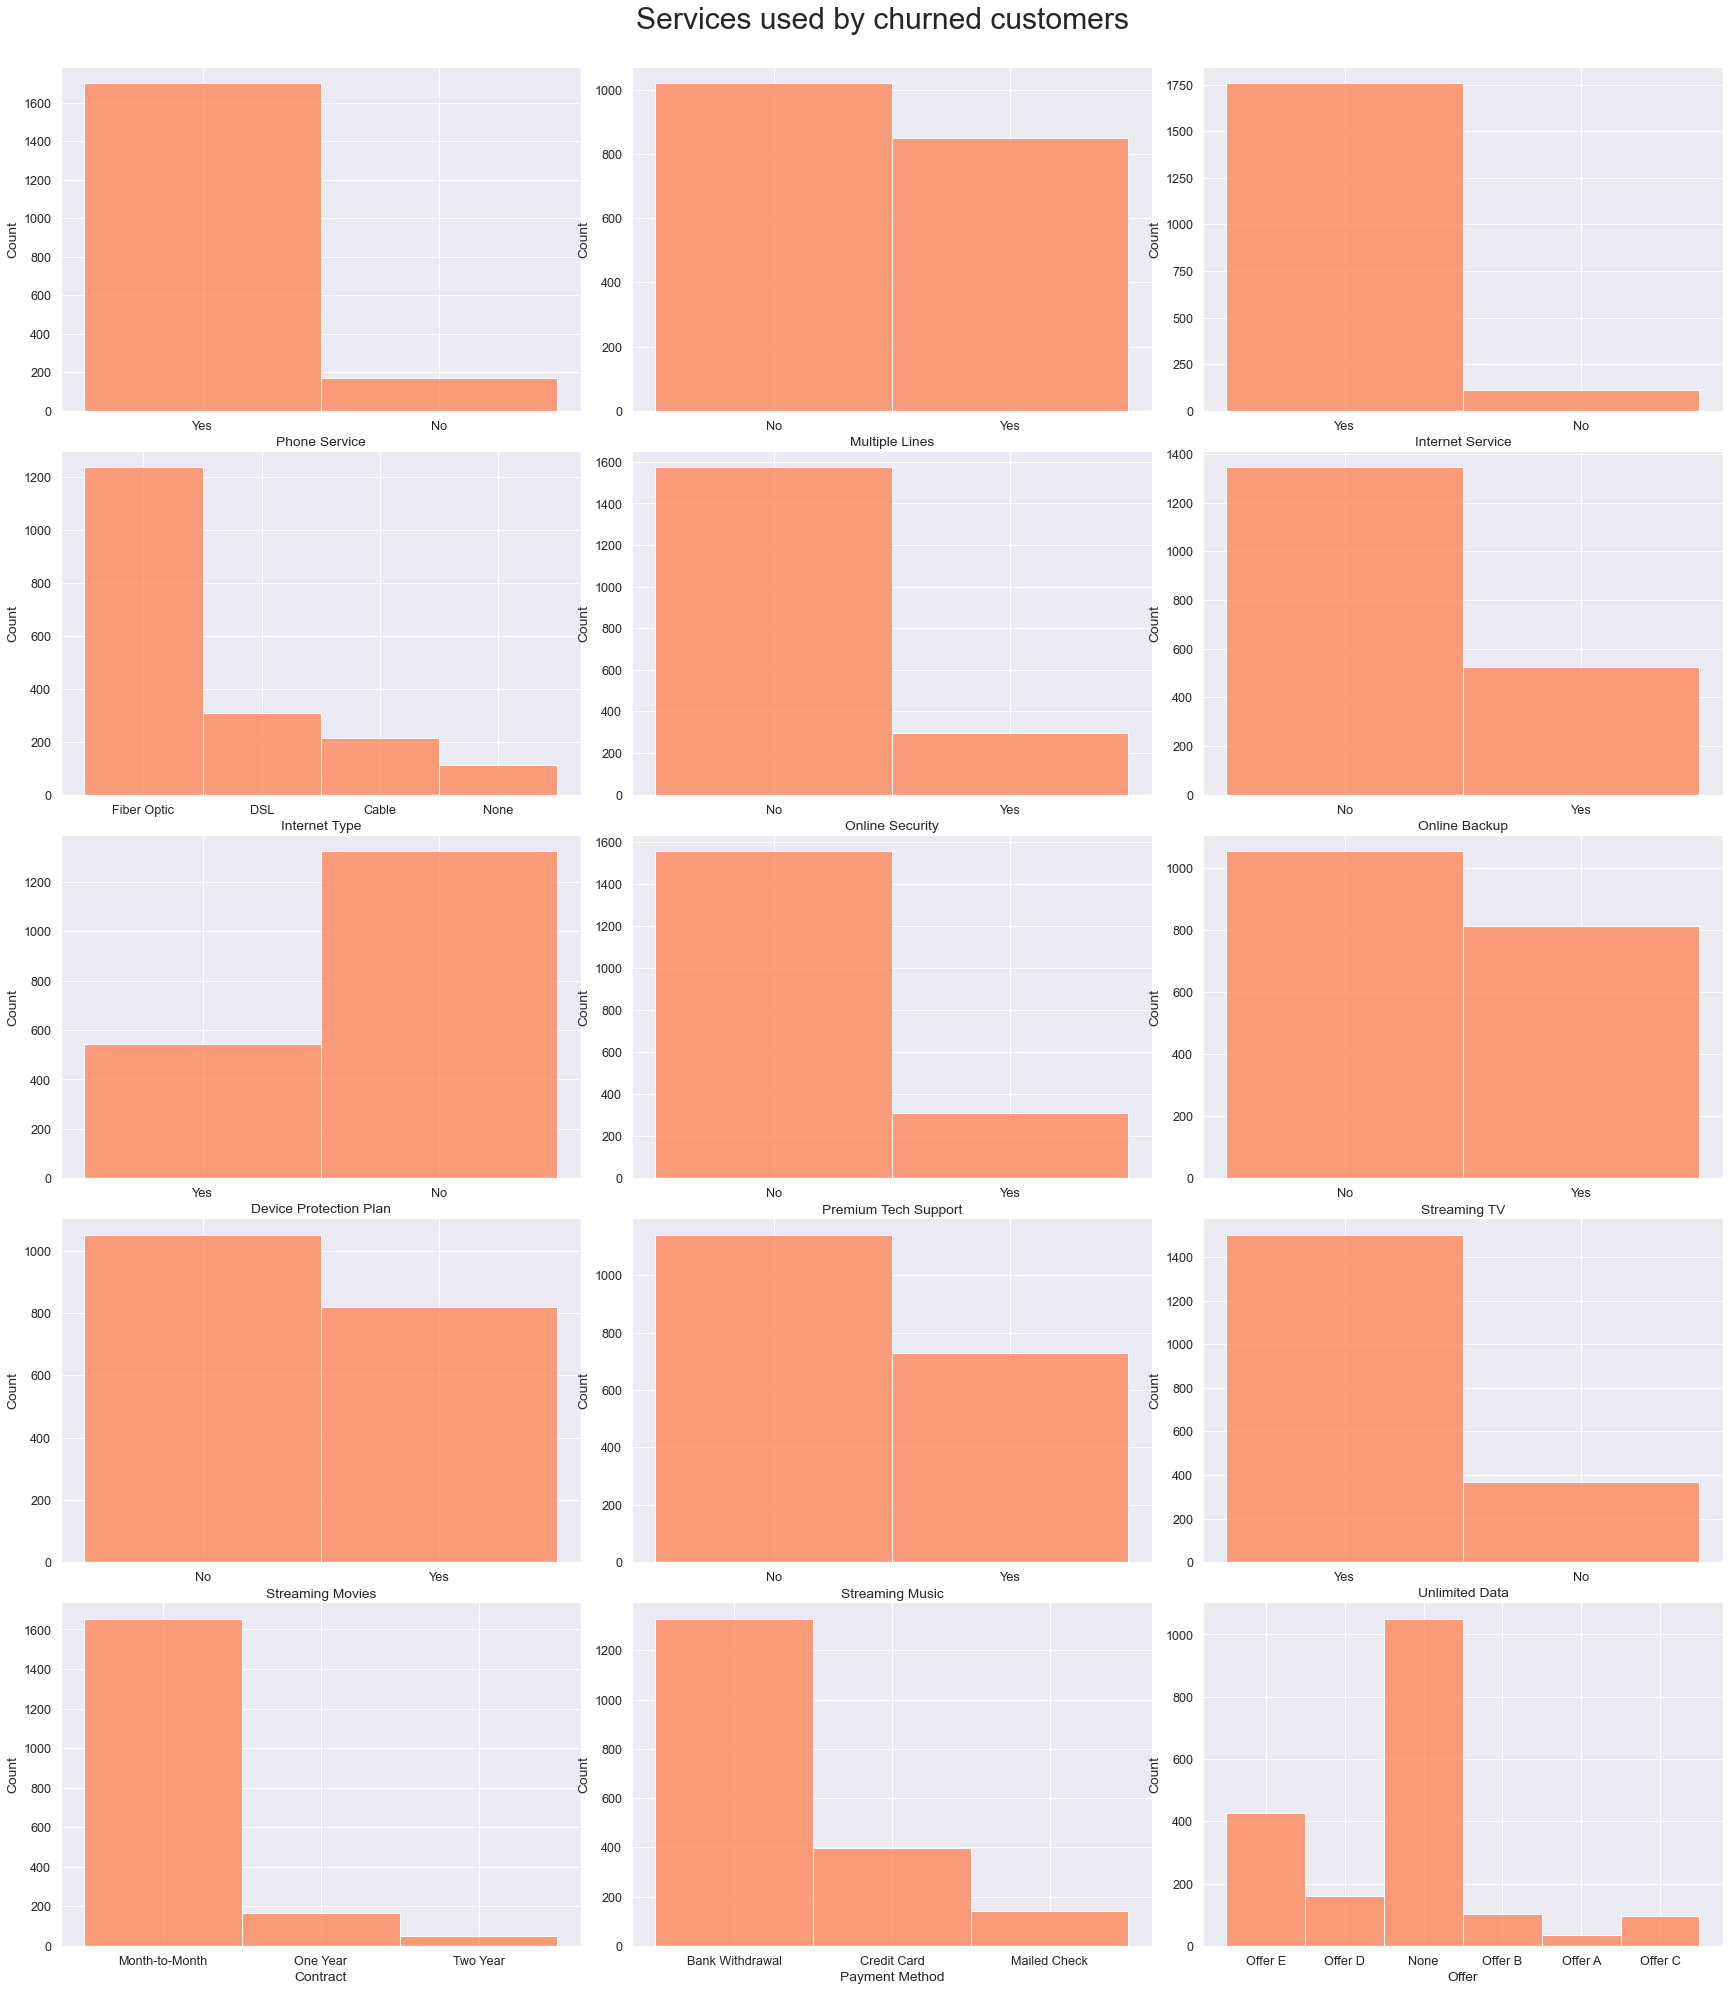

In [25]:
fig, ax = plt.subplots(5,3, figsize=(24,28))
plt.suptitle('Services used by churned customers',fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(churn_df['Phone Service'], ax=ax[0,0], color='coral') 
sns.histplot(churn_df['Multiple Lines'], bins = 20, ax=ax[0,1], color='coral') 
sns.histplot(churn_df['Internet Service'], bins = 20, ax=ax[0,2], color='coral') 
sns.histplot(churn_df['Internet Type'], bins = 20, ax=ax[1,0], color='coral') 
sns.histplot(churn_df['Online Security'], bins = 20, ax=ax[1,1], color='coral')
sns.histplot(churn_df['Online Backup'], bins = 20, ax=ax[1,2], color='coral')
sns.histplot(churn_df['Device Protection Plan'], bins = 20, ax=ax[2,0], color='coral') 
sns.histplot(churn_df['Premium Tech Support'], bins = 20, ax=ax[2,1], color='coral') 
sns.histplot(churn_df['Streaming TV'], bins = 20, ax=ax[2,2], color='coral')
sns.histplot(churn_df['Streaming Movies'], bins = 20, ax=ax[3,0], color='coral') 
sns.histplot(churn_df['Streaming Music'], bins = 20, ax=ax[3,1], color='coral') 
sns.histplot(churn_df['Unlimited Data'], bins = 20, ax=ax[3,2], color='coral')
sns.histplot(churn_df['Contract'], bins = 20, ax=ax[4,0], color='coral') 
sns.histplot(churn_df['Payment Method'], bins = 20, ax=ax[4,1], color='coral')
sns.histplot(churn_df['Offer'], bins = 20, ax=ax[4,2], color='coral')  

From the graph above shows that majority of customers churned chose:
1. Phone Service
2. Internet Service with Fiber Optic type
3. Unlimited data
4. Month-to-Month contract type
5. Bank withdrawal 
6. No offer, but the second highest is Offer E


Majority of them did not choose:
1. Online security
2. Online backup
3. Device protection plan
4. Premium tech support
5. Streaming TV
6. Streaming movies
7. Streaming music
8. Offers

<AxesSubplot:xlabel='Total Extra Data Charges', ylabel='Count'>

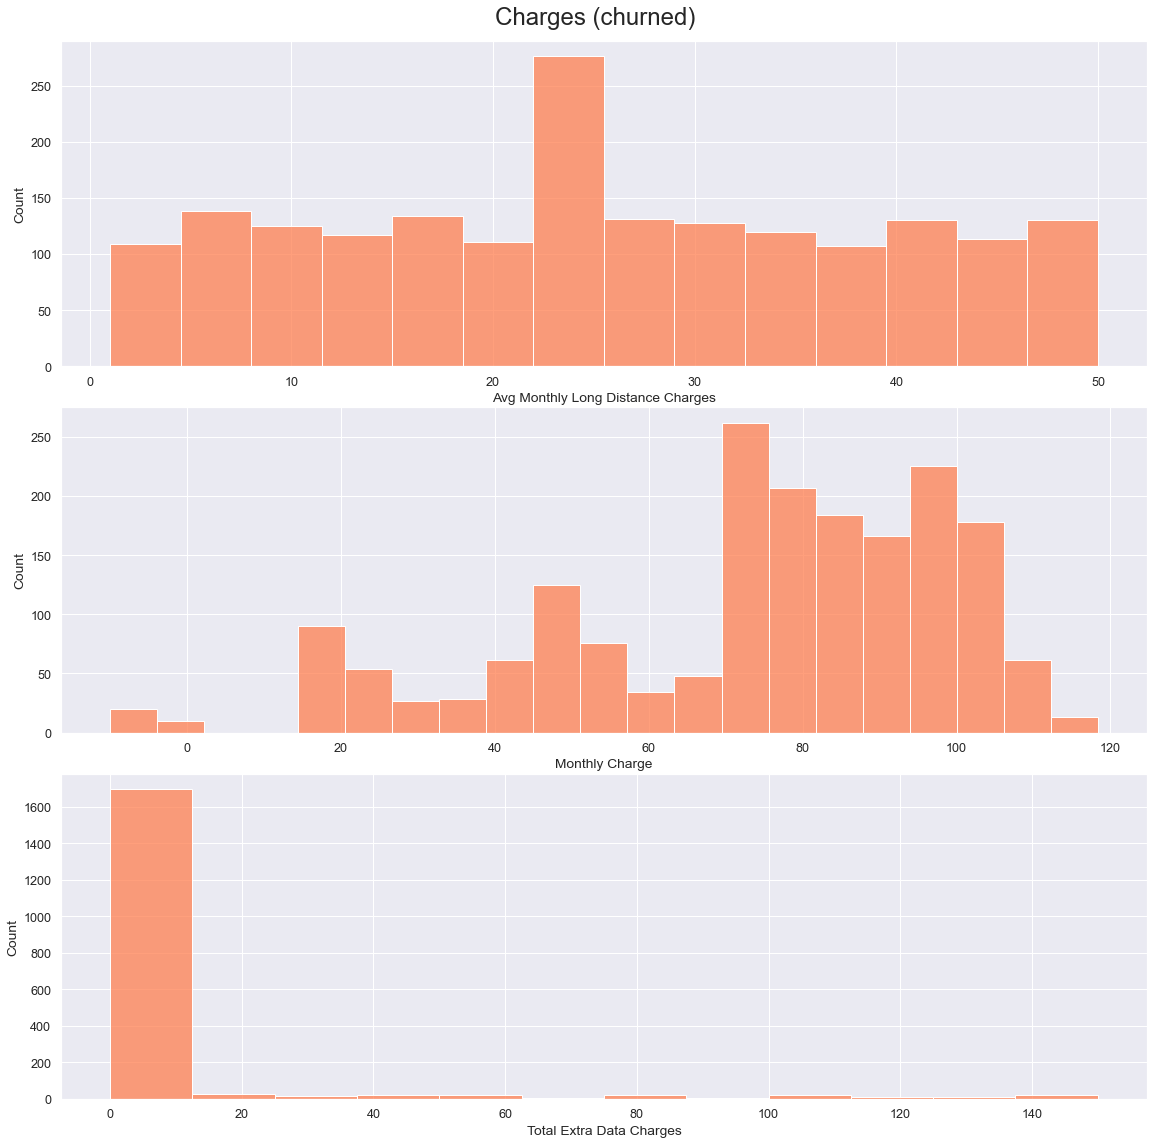

In [26]:
fig, ax = plt.subplots(3,1, figsize=(16,16))
plt.suptitle('Charges (churned)',fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(churn_df['Avg Monthly Long Distance Charges'], ax=ax[0], color='coral') 
sns.histplot(churn_df['Monthly Charge'], ax=ax[1], color='coral')
sns.histplot(churn_df['Total Extra Data Charges'], ax=ax[2], color='coral')
 

## High value customers

High value customers are those who drive more revenue for the company, therefore the calculation would be as below:

In [27]:
mean_revenue = df1["Total Revenue"].mean()



### Proportions

Now let's see how many high value customers compared to all customers

Turns out, high value customers are 39.22% of total customers, which is almost the half

In [ ]:
high_value = pd.DataFrame((df1[df1["Total Revenue"] > mean_revenue]))

Text(0.5, 1.0, 'Customer proportions')

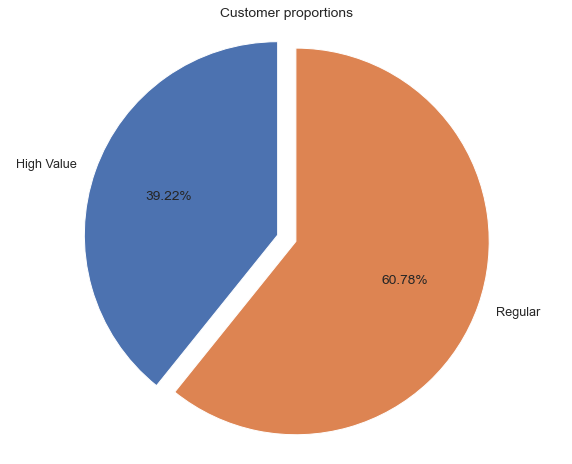

In [32]:
labels = 'High Value', 'Regular'
sizes = [(round(len(high_value)/len(df1) * 100,2)), round(len(df1[df1["Total Revenue"] < mean_revenue])/len(df1) * 100,2)]
explode = (0.1, 0.0) 

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Customer proportions")

In [30]:
high_value.head()



,Gender,Age,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
6,Female,67,0,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,...,Bank Withdrawal,109.70,7904.25,0.0,0,707.16,8611.41,0,Other,Not stated
7,Male,52,0,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,...,Credit Card,84.65,5377.80,0.0,20,816.48,6214.28,0,Other,Not stated
9,Female,43,1,65,None,Yes,28.46,Yes,Yes,Cable,...,Credit Card,90.45,5957.90,0.0,0,1849.90,7807.80,0,Other,Not stated
11,Female,25,2,72,None,Yes,16.01,Yes,Yes,Fiber Optic,...,Credit Card,116.80,8456.75,0.0,0,1152.72,9609.47,0,Other,Not stated
13,Female,32,0,72,Offer A,Yes,2.25,Yes,Yes,Fiber Optic,...,Bank Withdrawal,101.30,7261.25,0.0,0,162.00,7423.25,0,Other,Not stated


In [ ]:
high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762 entries, 6 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2762 non-null   object 
 1   Age                                2762 non-null   int64  
 2   Number of Dependents               2762 non-null   int64  
 3   Tenure in Months                   2762 non-null   int64  
 4   Offer                              2762 non-null   object 
 5   Phone Service                      2762 non-null   object 
 6   Avg Monthly Long Distance Charges  2762 non-null   float64
 7   Multiple Lines                     2762 non-null   object 
 8   Internet Service                   2762 non-null   object 
 9   Internet Type                      2762 non-null   object 
 10  Avg Monthly GB Download            2762 non-null   float64
 11  Online Security                    2762 non-null   objec

Who are them?

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Count'>

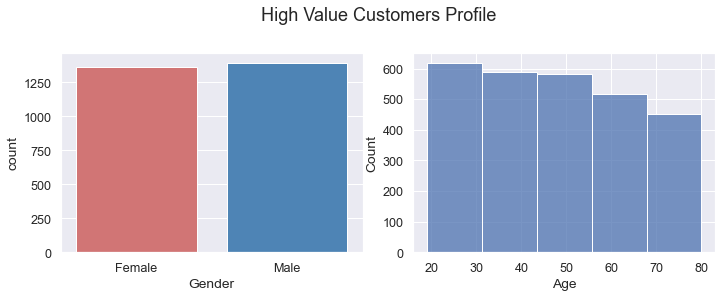

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.suptitle('High Value Customers Profile',fontsize=18)
fig.tight_layout()


sns.countplot(high_value['Gender'], ax=ax[0], palette=['#e06666', '#3d85c6']) 
sns.histplot(high_value['Age'], bins=5, ax=ax[1])

<div class="alert alert-block alert-info">
<b>Are there customers in high value category churned?</b>


Churning high value customers can lead to decrease in revenue and profit, therefore we need to make analysis based on that
</div>

Text(0.5, 1.02, 'Customer Status Per Category')

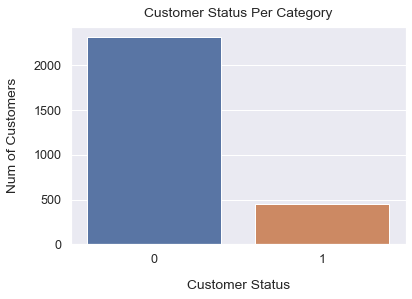

In [ ]:
sns.countplot(x="Customer Status",data=high_value)

plt.xlabel("Customer Status", labelpad=14)
plt.ylabel("Num of Customers", labelpad=14)
plt.title("Customer Status Per Category", y=1.02)

How does this compare to the number of all customers?

In [ ]:
print('High value customers who stayed are', round(high_value['Customer Status'].value_counts()[0]/len(df1) * 100,2), '% of all customers')
print('High value customers who churned are', round(high_value['Customer Status'].value_counts()[1]/len(df1) * 100,2), '% of all customers')

High value customers who stayed are 32.88 % of all customers
High value customers who churned are 6.33 % of all customers


and how about churned customers among high value category?

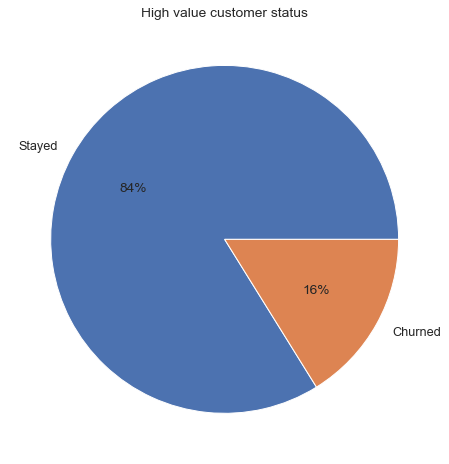

In [ ]:

status = high_value['Customer Status'].replace({1 : 'Churned', 0 : 'Stayed'}).unique()

high_value['Customer Status'].value_counts().plot(kind='pie', figsize=(10, 8), labels=status, autopct='%.0f%%')
  
# displaying chart
plt.xlabel("")
plt.ylabel("")
plt.title("High value customer status")
plt.show()

Too bad that there are 16% of high value customers who decided to churn. More detailed analysis is needed to know about their profile further, like what services they used, their preferences, etc

<AxesSubplot:xlabel='Offer', ylabel='Count'>

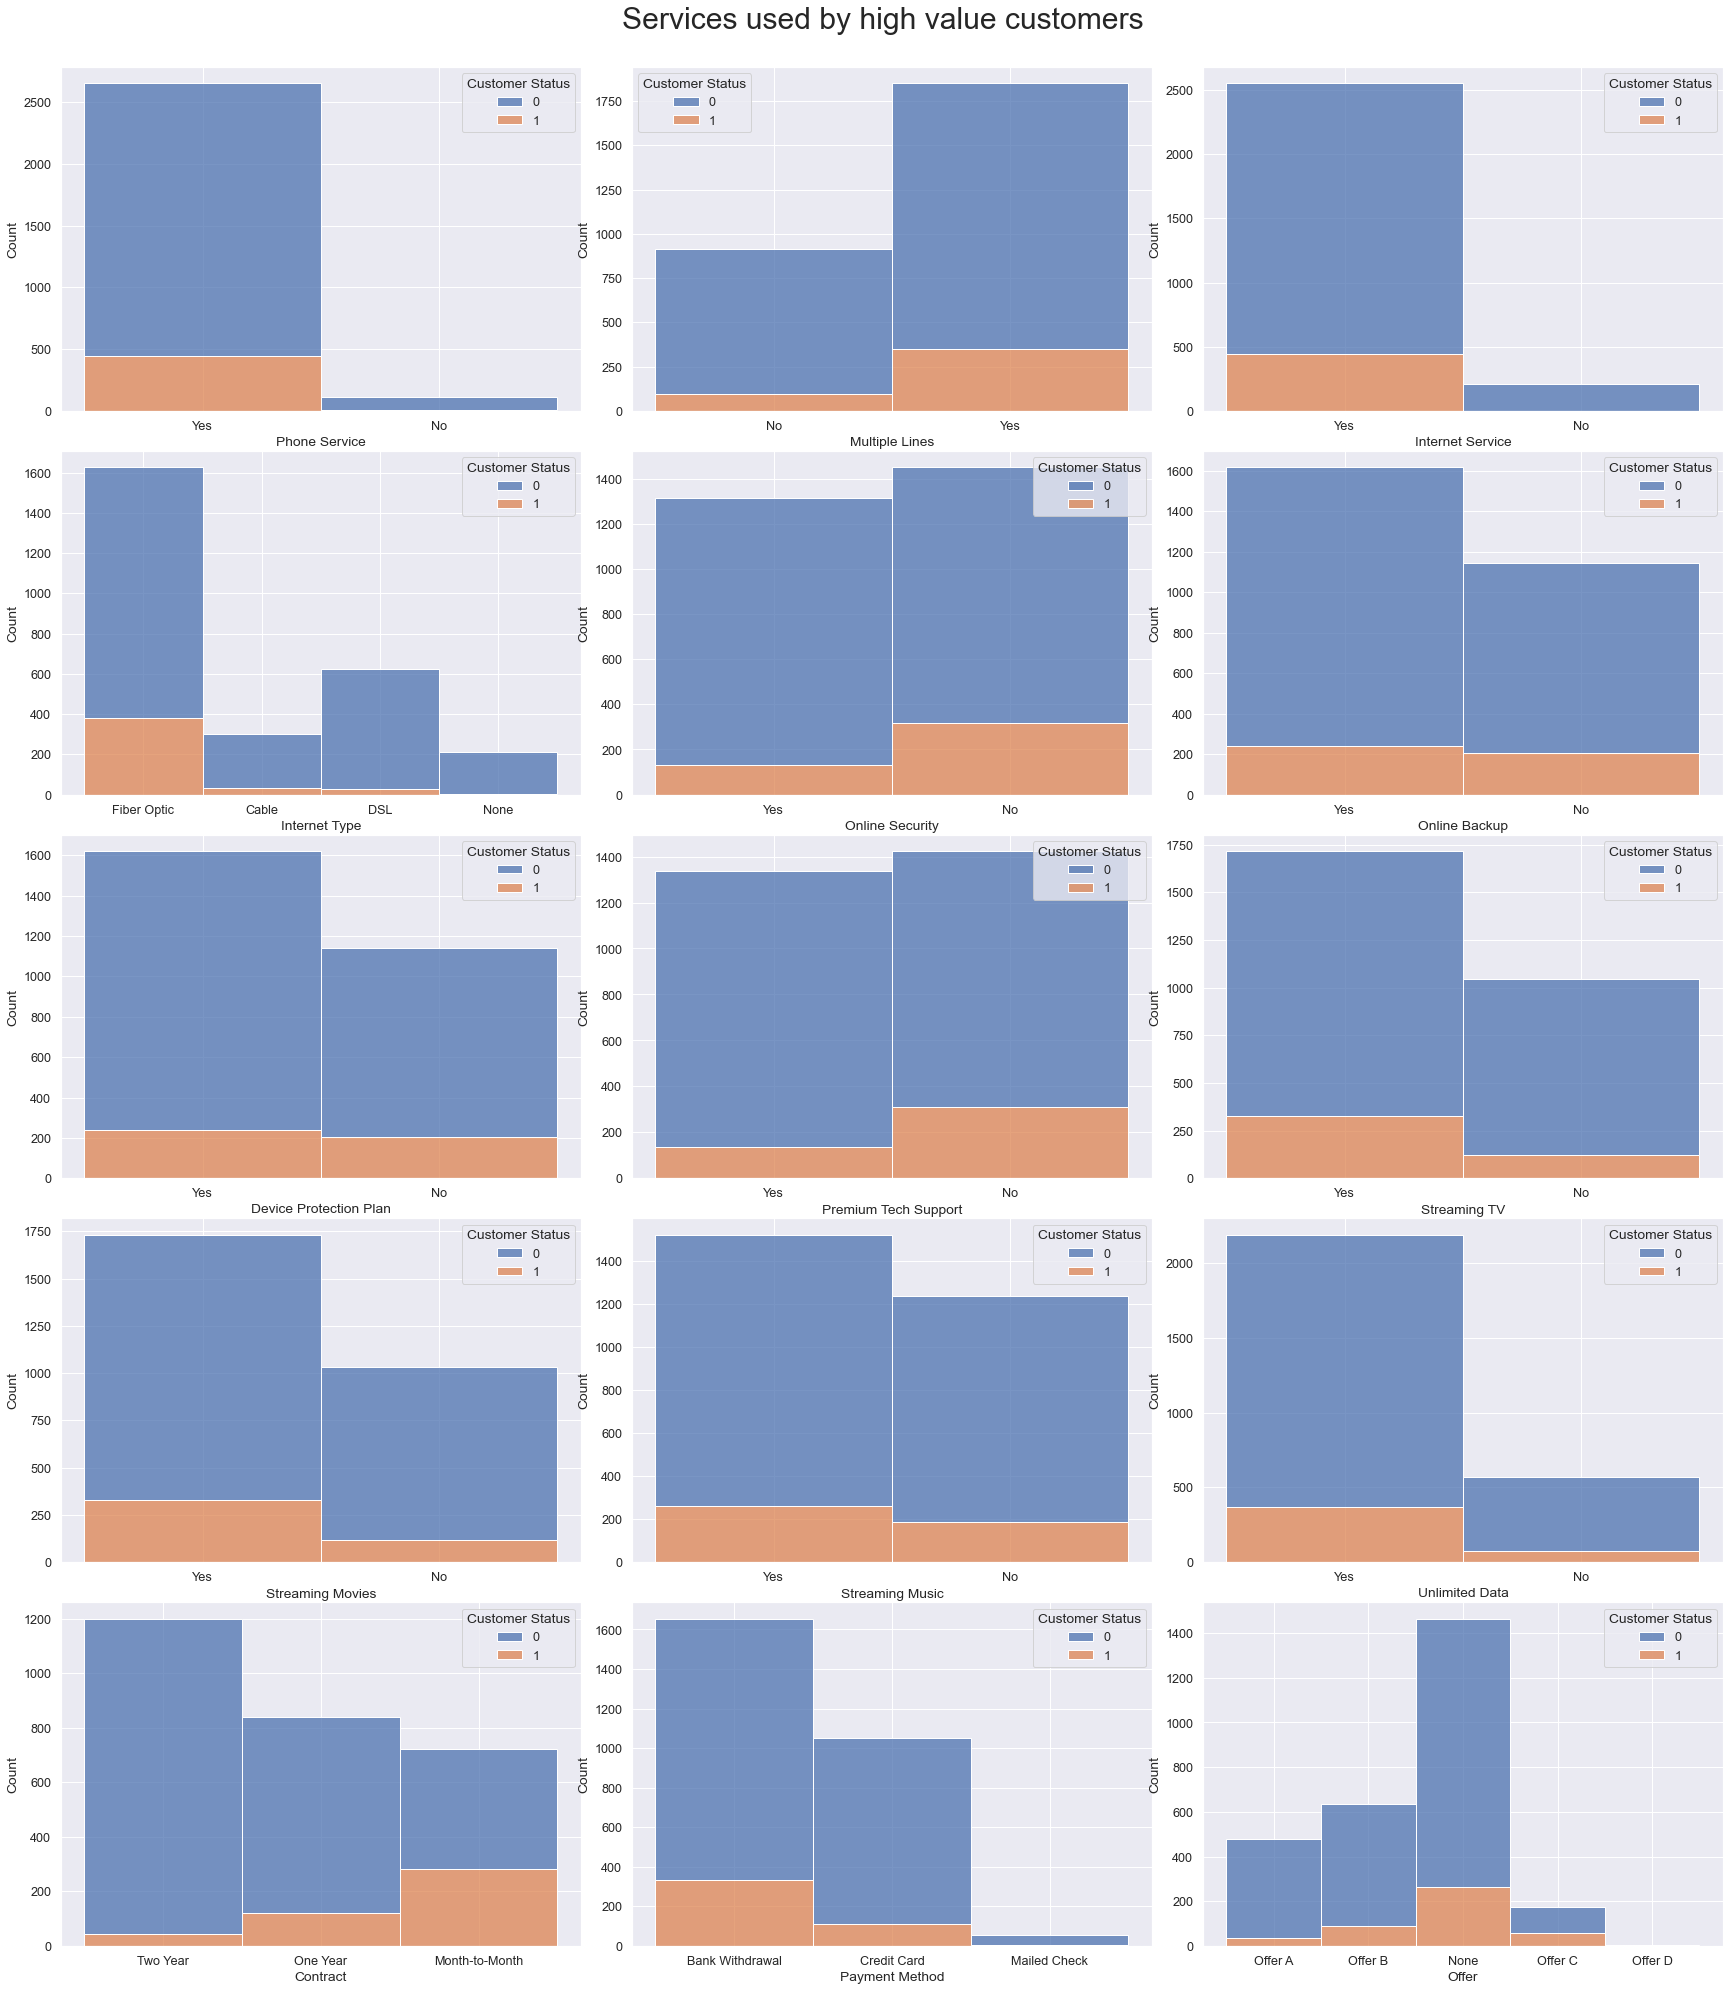

In [61]:
fig, ax = plt.subplots(5,3, figsize=(24,28))
plt.suptitle('Services used by high value customers',fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(high_value, x='Phone Service', hue="Customer Status", multiple="stack", ax=ax[0,0]) 
sns.histplot(high_value, x = 'Multiple Lines', hue="Customer Status", multiple="stack", bins = 20, ax=ax[0,1]) 
sns.histplot(high_value, x='Internet Service', hue="Customer Status", multiple="stack", bins = 20, ax=ax[0,2]) 
sns.histplot(high_value, x='Internet Type', hue="Customer Status", multiple="stack", bins = 20, ax=ax[1,0]) 
sns.histplot(high_value, x='Online Security', hue="Customer Status", multiple="stack", bins = 20, ax=ax[1,1])
sns.histplot(high_value, x='Online Backup', hue="Customer Status", multiple="stack", bins = 20, ax=ax[1,2])
sns.histplot(high_value, x='Device Protection Plan', hue="Customer Status", multiple="stack", bins = 20, ax=ax[2,0]) 
sns.histplot(high_value, x='Premium Tech Support', hue="Customer Status", multiple="stack", bins = 20, ax=ax[2,1]) 
sns.histplot(high_value, x='Streaming TV', hue="Customer Status", multiple="stack", bins = 20, ax=ax[2,2])
sns.histplot(high_value, x='Streaming Movies', hue="Customer Status", multiple="stack",  bins = 20, ax=ax[3,0]) 
sns.histplot(high_value, x='Streaming Music', hue="Customer Status", multiple="stack", bins = 20, ax=ax[3,1]) 
sns.histplot(high_value, x='Unlimited Data', hue="Customer Status", multiple="stack", bins = 20, ax=ax[3,2])
sns.histplot(high_value, x='Contract', hue="Customer Status", multiple="stack", bins = 20, ax=ax[4,0]) 
sns.histplot(high_value, x='Payment Method', hue="Customer Status", multiple="stack", bins = 20, ax=ax[4,1])
sns.histplot(high_value, x='Offer', hue="Customer Status", multiple="stack", bins = 20, ax=ax[4,2])  

From the graph above shows that majority of high value customers chose:
1. Phone Service
2. Multiple Lines
3. Internet Service with Fiber Optic type
4. Online backup
6. Streaming TV
7. Streaming movies
8. Streaming music
9. Unlimited data
10. Month-to-Month contract type
11. Bank withdrawal 
12. Device protection plan


Majority of them did not choose:
1. Online security
2. Premium tech support
3. All offers and 0 customers for Offer E

### Churned

In [ ]:
high_value_churn = pd.DataFrame((churn_df[churn_df["Total Revenue"] > mean_revenue]))
high_value_churn.head()


,Gender,Age,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
18,Male,79,0,45,None,Yes,10.67,No,Yes,DSL,...,Credit Card,62.70,2791.50,0.0,0,480.15,3271.65,1,Dissatisfaction,Limited range of services
53,Male,51,0,40,None,Yes,37.69,Yes,Yes,Fiber Optic,...,Credit Card,104.50,4036.85,0.0,0,1507.60,5544.45,1,Competitor,Competitor had better devices
67,Male,61,0,49,Offer B,Yes,39.55,Yes,Yes,Cable,...,Bank Withdrawal,84.35,4059.35,0.0,0,1937.95,5997.30,1,Competitor,Competitor offered higher download speeds
71,Male,24,0,21,None,Yes,36.26,Yes,Yes,Fiber Optic,...,Bank Withdrawal,111.20,2317.10,0.0,120,761.46,3198.56,1,Attitude,Attitude of service provider
92,Male,41,0,25,None,Yes,34.88,Yes,Yes,Fiber Optic,...,Bank Withdrawal,94.70,2362.10,0.0,0,872.00,3234.10,1,Competitor,Competitor had better devices


In [ ]:
high_value_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 18 to 7013
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             446 non-null    object 
 1   Age                                446 non-null    int64  
 2   Number of Dependents               446 non-null    int64  
 3   Tenure in Months                   446 non-null    int64  
 4   Offer                              446 non-null    object 
 5   Phone Service                      446 non-null    object 
 6   Avg Monthly Long Distance Charges  446 non-null    float64
 7   Multiple Lines                     446 non-null    object 
 8   Internet Service                   446 non-null    object 
 9   Internet Type                      446 non-null    object 
 10  Avg Monthly GB Download            446 non-null    float64
 11  Online Security                    446 non-null    objec

In [ ]:
high_value_churn.describe()

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.0
mean,51.887892,0.033632,46.746637,28.891687,23.179798,93.093049,4424.918161,1.761749,13.408072,1312.642108,5749.206592,1.0
std,18.298302,0.261781,13.752905,13.976836,18.071441,16.790058,1587.163312,7.182635,35.417882,785.284389,2015.313012,0.0
min,19.000000,0.000000,21.000000,1.930000,2.000000,-8.000000,1182.550000,0.000000,0.000000,0.000000,3044.700000,1.0
25%,37.000000,0.000000,35.000000,17.577500,11.000000,85.250000,3052.275000,0.000000,0.000000,726.672500,3995.855000,1.0
50%,53.000000,0.000000,46.000000,30.735000,20.000000,98.025000,4187.025000,0.000000,0.000000,1197.060000,5359.865000,1.0
75%,68.000000,0.000000,58.000000,40.595000,27.000000,104.287500,5613.512500,0.000000,0.000000,1842.547500,7315.477500,1.0
max,80.000000,3.000000,72.000000,49.980000,85.000000,118.350000,8684.800000,48.540000,150.000000,3508.820000,11195.440000,1.0


Why they decided to churn?

Competitor         197
Dissatisfaction     75
Attitude            70
Price               58
Other               46
Name: Churn Category, dtype: int64


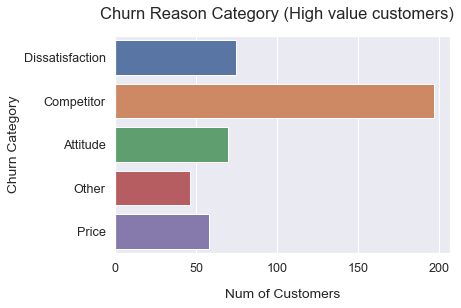

In [ ]:
print(high_value_churn['Churn Category'].value_counts())

sns.countplot(y="Churn Category",data=high_value_churn)
plt.suptitle("Churn Reason Category (High value customers)")
plt.xlabel("Num of Customers", labelpad=14)
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Count'>

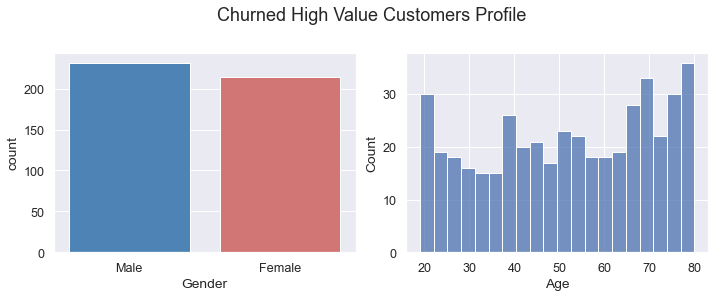

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.suptitle('Churned High Value Customers Profile',fontsize=18)
fig.tight_layout()


sns.countplot(high_value_churn['Gender'], ax=ax[0], palette=['#3d85c6', '#e06666']) 
sns.histplot(high_value_churn['Age'], bins=20, ax=ax[1])

A closer look for services used by churned high value customers with more focused plot

<AxesSubplot:xlabel='Offer', ylabel='Count'>

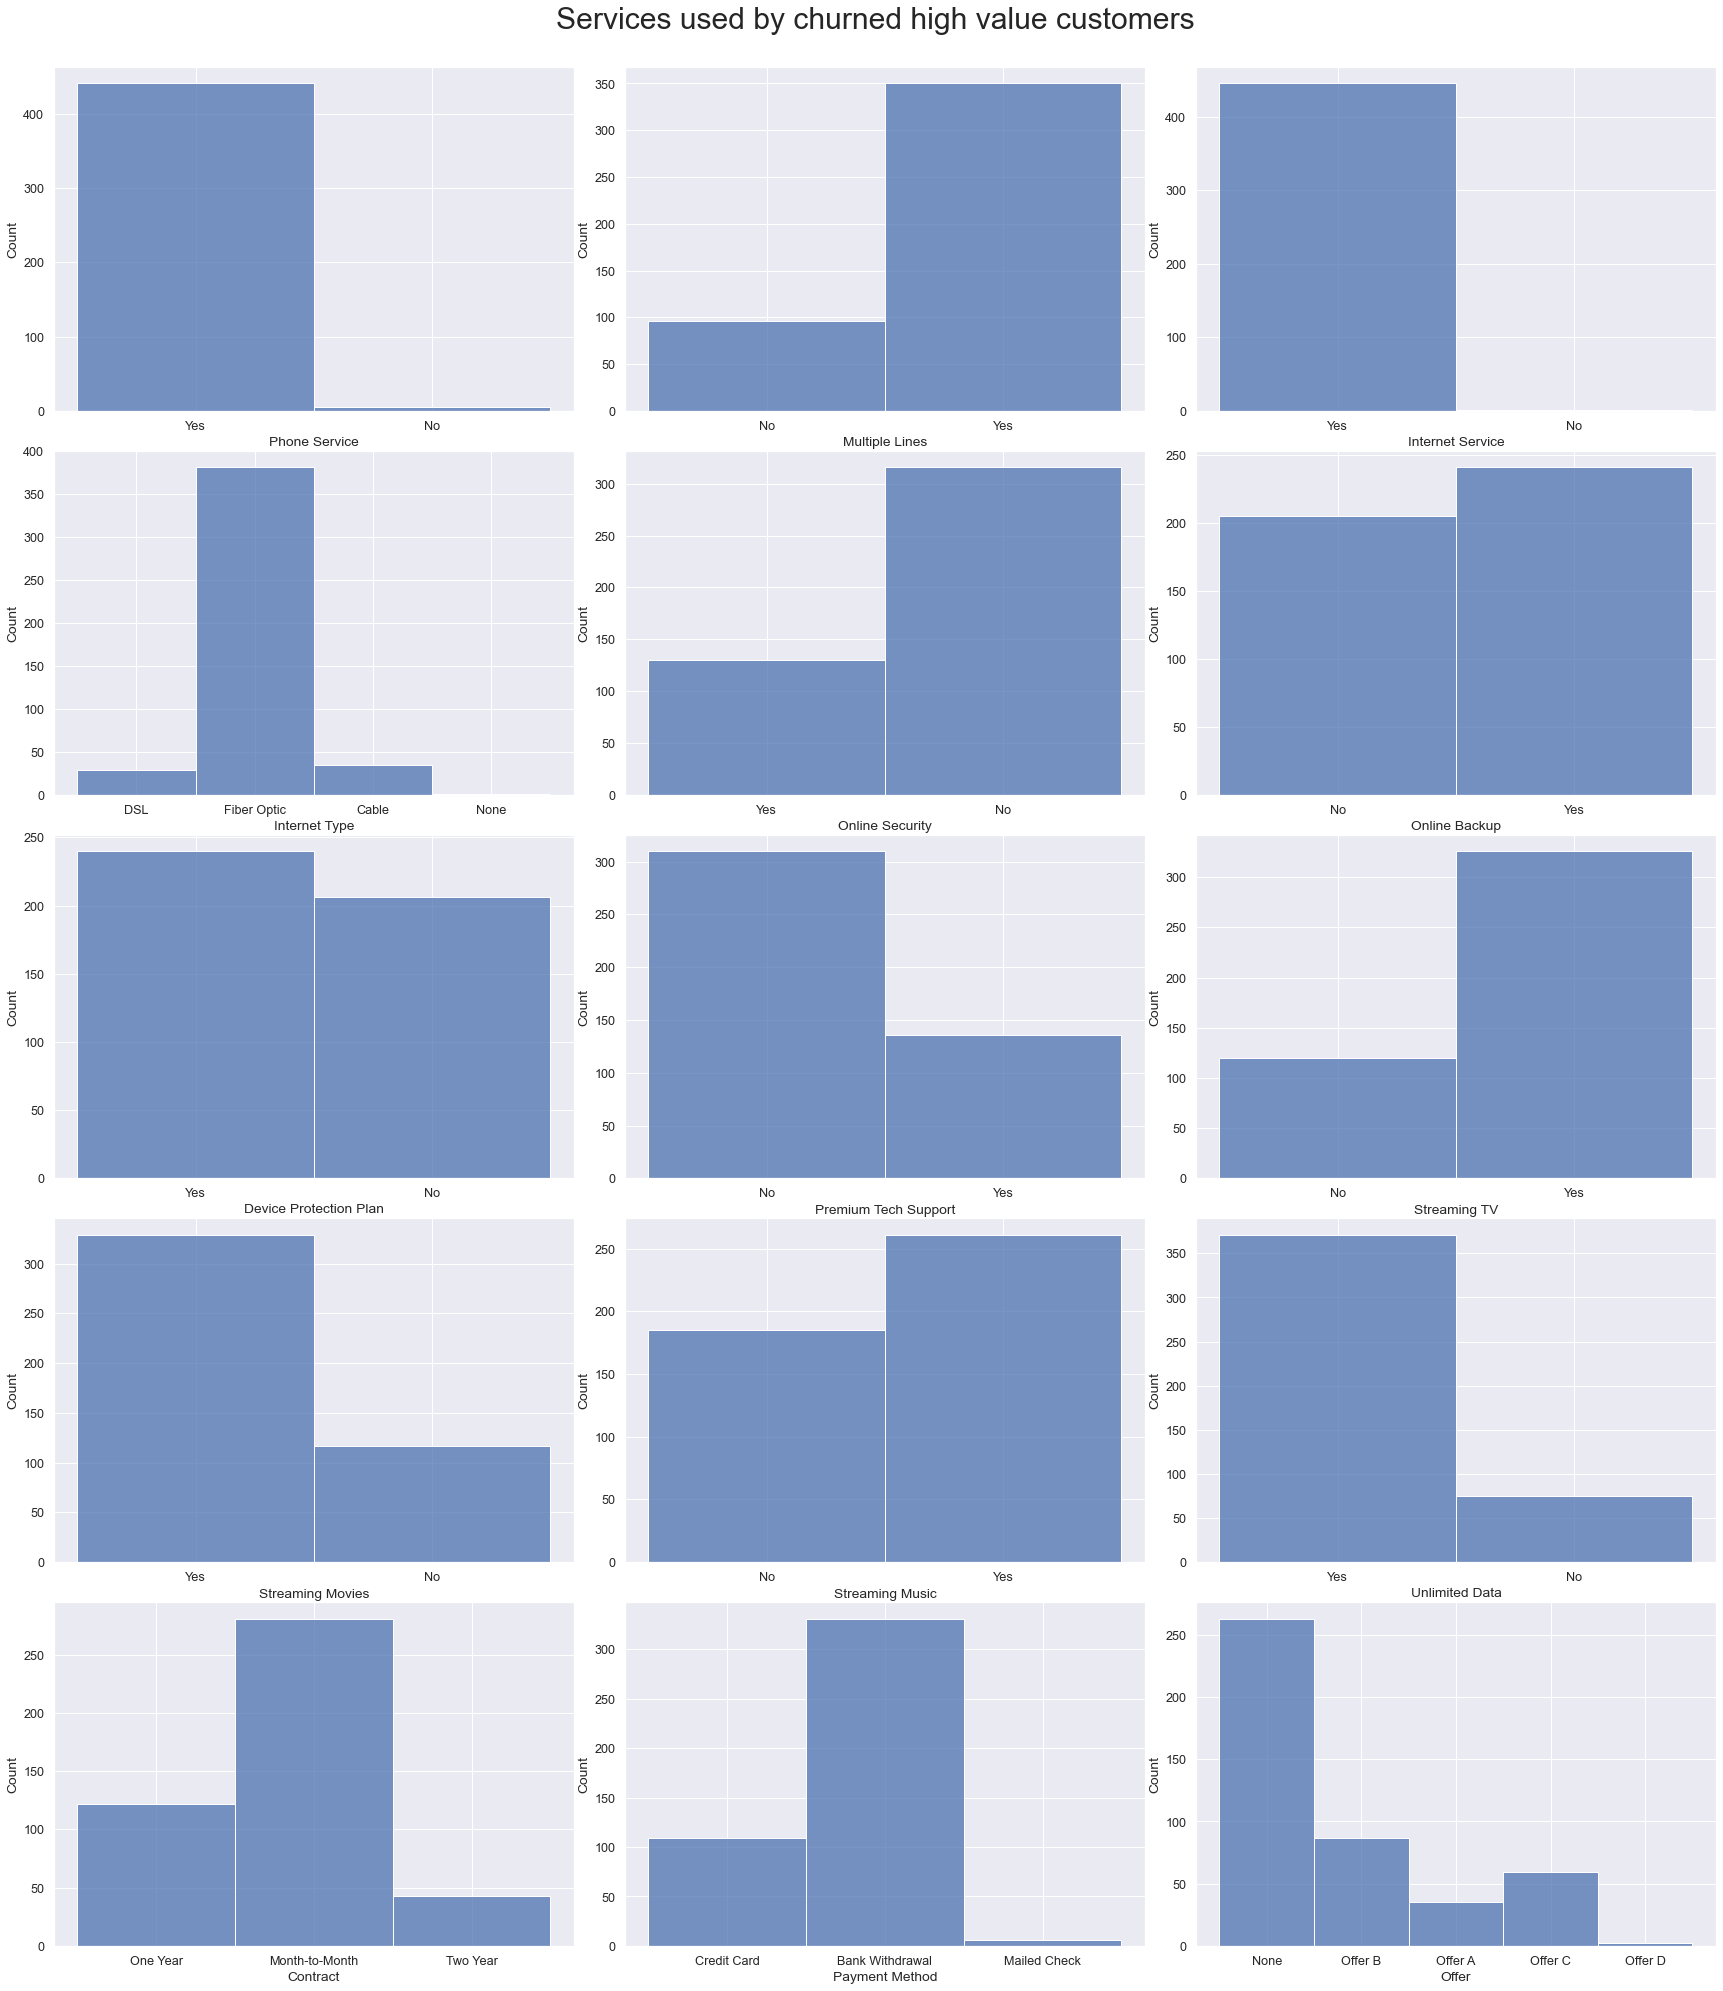

In [ ]:
fig, ax = plt.subplots(5,3, figsize=(24,28))
plt.suptitle('Services used by churned high value customers',fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(high_value_churn['Phone Service'], ax=ax[0,0]) 
sns.histplot(high_value_churn['Multiple Lines'], bins = 20, ax=ax[0,1]) 
sns.histplot(high_value_churn['Internet Service'], bins = 20, ax=ax[0,2]) 
sns.histplot(high_value_churn['Internet Type'], bins = 20, ax=ax[1,0]) 
sns.histplot(high_value_churn['Online Security'], bins = 20, ax=ax[1,1])
sns.histplot(high_value_churn['Online Backup'], bins = 20, ax=ax[1,2])
sns.histplot(high_value_churn['Device Protection Plan'], bins = 20, ax=ax[2,0]) 
sns.histplot(high_value_churn['Premium Tech Support'], bins = 20, ax=ax[2,1]) 
sns.histplot(high_value_churn['Streaming TV'], bins = 20, ax=ax[2,2])
sns.histplot(high_value_churn['Streaming Movies'], bins = 20, ax=ax[3,0]) 
sns.histplot(high_value_churn['Streaming Music'], bins = 20, ax=ax[3,1]) 
sns.histplot(high_value_churn['Unlimited Data'], bins = 20, ax=ax[3,2])
sns.histplot(high_value_churn['Contract'], bins = 20, ax=ax[4,0]) 
sns.histplot(high_value_churn['Payment Method'], bins = 20, ax=ax[4,1])
sns.histplot(high_value_churn['Offer'], bins = 20, ax=ax[4,2])  

<AxesSubplot:xlabel='Total Extra Data Charges', ylabel='Count'>

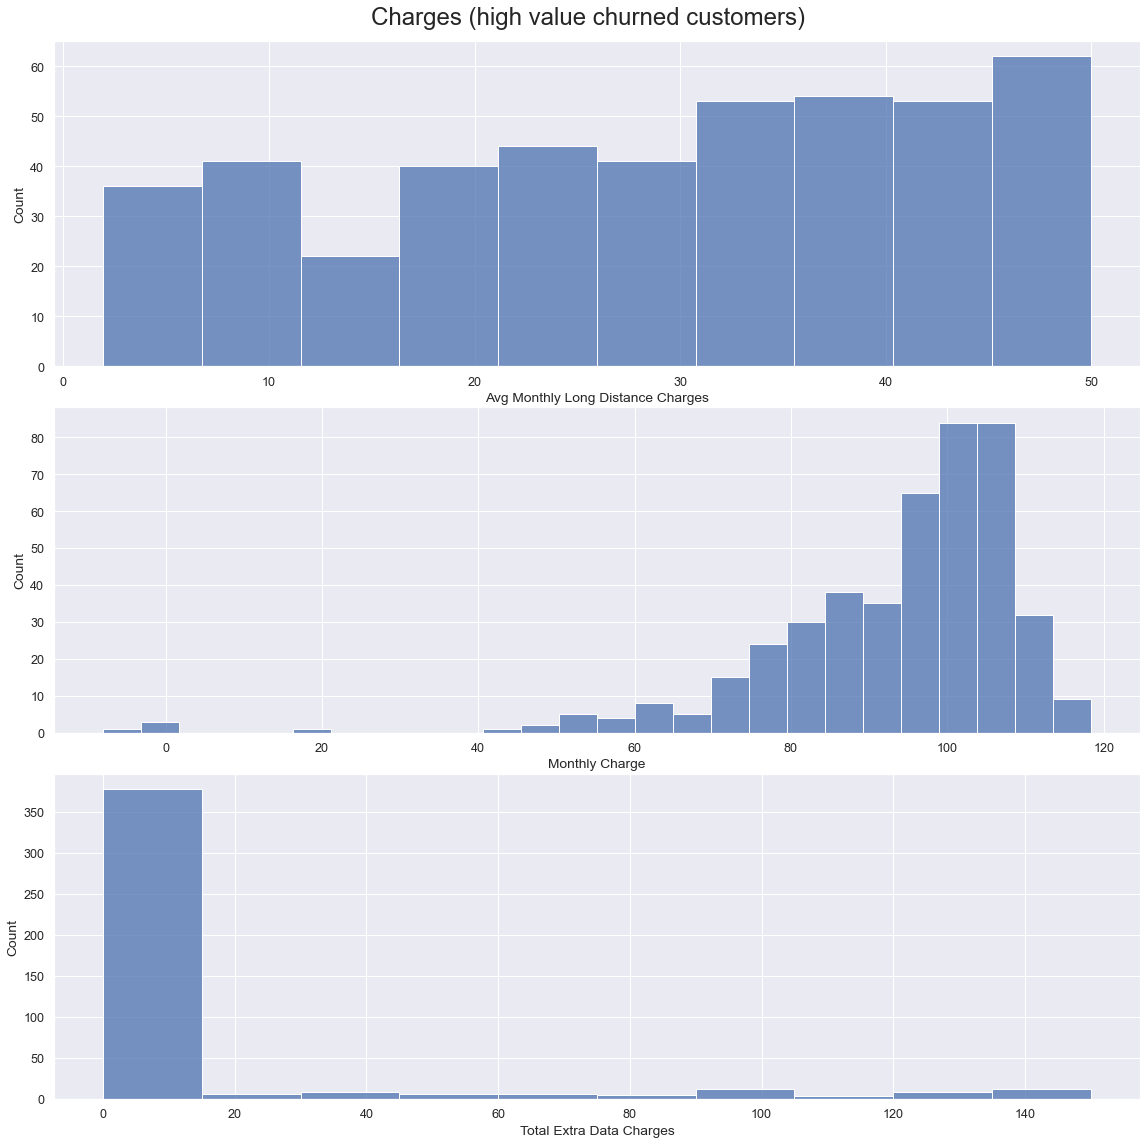

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(16,16))
plt.suptitle('Charges (high value churned customers)',fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(high_value_churn['Avg Monthly Long Distance Charges'], ax=ax[0]) 
sns.histplot(high_value_churn['Monthly Charge'], ax=ax[1]) 
sns.histplot(high_value_churn['Total Extra Data Charges'], ax=ax[2])
 

From the graphs above it can be seen that high value customers tend to have high monthly charge, as they used many services

### Stayed

How about high value customers who are staying? The following analysis will help to see what services they like to use and their charges amount, so we can make recommendations to retain them

In [ ]:
stayed_df = pd.DataFrame((df1[df1['Customer Status'] == 0]))

stayed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5174 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5174 non-null   object 
 1   Age                                5174 non-null   int64  
 2   Number of Dependents               5174 non-null   int64  
 3   Tenure in Months                   5174 non-null   int64  
 4   Offer                              5174 non-null   object 
 5   Phone Service                      5174 non-null   object 
 6   Avg Monthly Long Distance Charges  5174 non-null   float64
 7   Multiple Lines                     5174 non-null   object 
 8   Internet Service                   5174 non-null   object 
 9   Internet Type                      5174 non-null   object 
 10  Avg Monthly GB Download            5174 non-null   float64
 11  Online Security                    5174 non-null   objec

In [ ]:
high_value_stay = pd.DataFrame((stayed_df[stayed_df["Total Revenue"] > mean_revenue]))
high_value_stay.head()


,Gender,Age,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
6,Female,67,0,71,Offer A,Yes,9.96,No,Yes,Fiber Optic,...,Bank Withdrawal,109.70,7904.25,0.0,0,707.16,8611.41,0,Other,Not stated
7,Male,52,0,63,Offer B,Yes,12.96,Yes,Yes,Fiber Optic,...,Credit Card,84.65,5377.80,0.0,20,816.48,6214.28,0,Other,Not stated
9,Female,43,1,65,None,Yes,28.46,Yes,Yes,Cable,...,Credit Card,90.45,5957.90,0.0,0,1849.90,7807.80,0,Other,Not stated
11,Female,25,2,72,None,Yes,16.01,Yes,Yes,Fiber Optic,...,Credit Card,116.80,8456.75,0.0,0,1152.72,9609.47,0,Other,Not stated
13,Female,32,0,72,Offer A,Yes,2.25,Yes,Yes,Fiber Optic,...,Bank Withdrawal,101.30,7261.25,0.0,0,162.00,7423.25,0,Other,Not stated


In [ ]:
high_value_stay.describe()

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.0
mean,46.709413,0.593264,57.240933,27.483214,27.381132,80.273100,4650.024914,2.411265,9.654577,1474.978536,6132.246762,0.0
std,16.974093,1.044755,13.356672,13.788034,19.313361,27.130799,1875.591405,8.662050,30.275364,910.779384,2143.213309,0.0
min,19.000000,0.000000,22.000000,1.020000,2.000000,-10.000000,900.900000,0.000000,0.000000,0.000000,3035.710000,0.0
25%,33.000000,0.000000,48.000000,16.375000,14.000000,67.437500,3251.712500,0.000000,0.000000,742.765000,4219.147500,0.0
50%,46.000000,0.000000,61.000000,27.590000,23.000000,85.900000,4596.900000,0.000000,0.000000,1440.435000,5917.780000,0.0
75%,60.000000,1.000000,69.000000,39.325000,30.000000,100.412500,6068.800000,0.000000,0.000000,2163.225000,7750.590000,0.0
max,80.000000,8.000000,72.000000,49.990000,85.000000,118.750000,8672.450000,49.760000,150.000000,3564.720000,11979.340000,0.0


In [ ]:
high_value_stay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 6 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             2316 non-null   object 
 1   Age                                2316 non-null   int64  
 2   Number of Dependents               2316 non-null   int64  
 3   Tenure in Months                   2316 non-null   int64  
 4   Offer                              2316 non-null   object 
 5   Phone Service                      2316 non-null   object 
 6   Avg Monthly Long Distance Charges  2316 non-null   float64
 7   Multiple Lines                     2316 non-null   object 
 8   Internet Service                   2316 non-null   object 
 9   Internet Type                      2316 non-null   object 
 10  Avg Monthly GB Download            2316 non-null   float64
 11  Online Security                    2316 non-null   objec

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Count'>

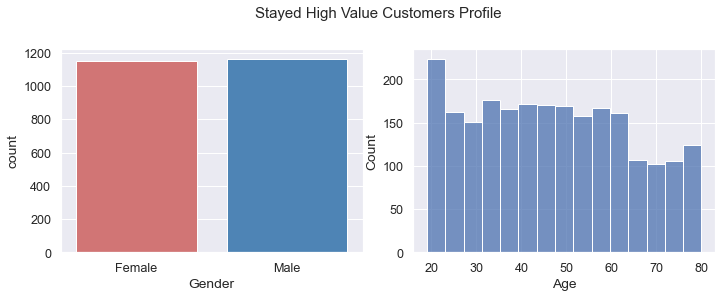

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.suptitle('Stayed High Value Customers Profile',fontsize=15)
fig.tight_layout()


sns.countplot(high_value_stay['Gender'], ax=ax[0], palette=['#e06666', '#3d85c6']) 
sns.histplot(high_value_stay['Age'], ax=ax[1])

<AxesSubplot:xlabel='Offer', ylabel='Count'>

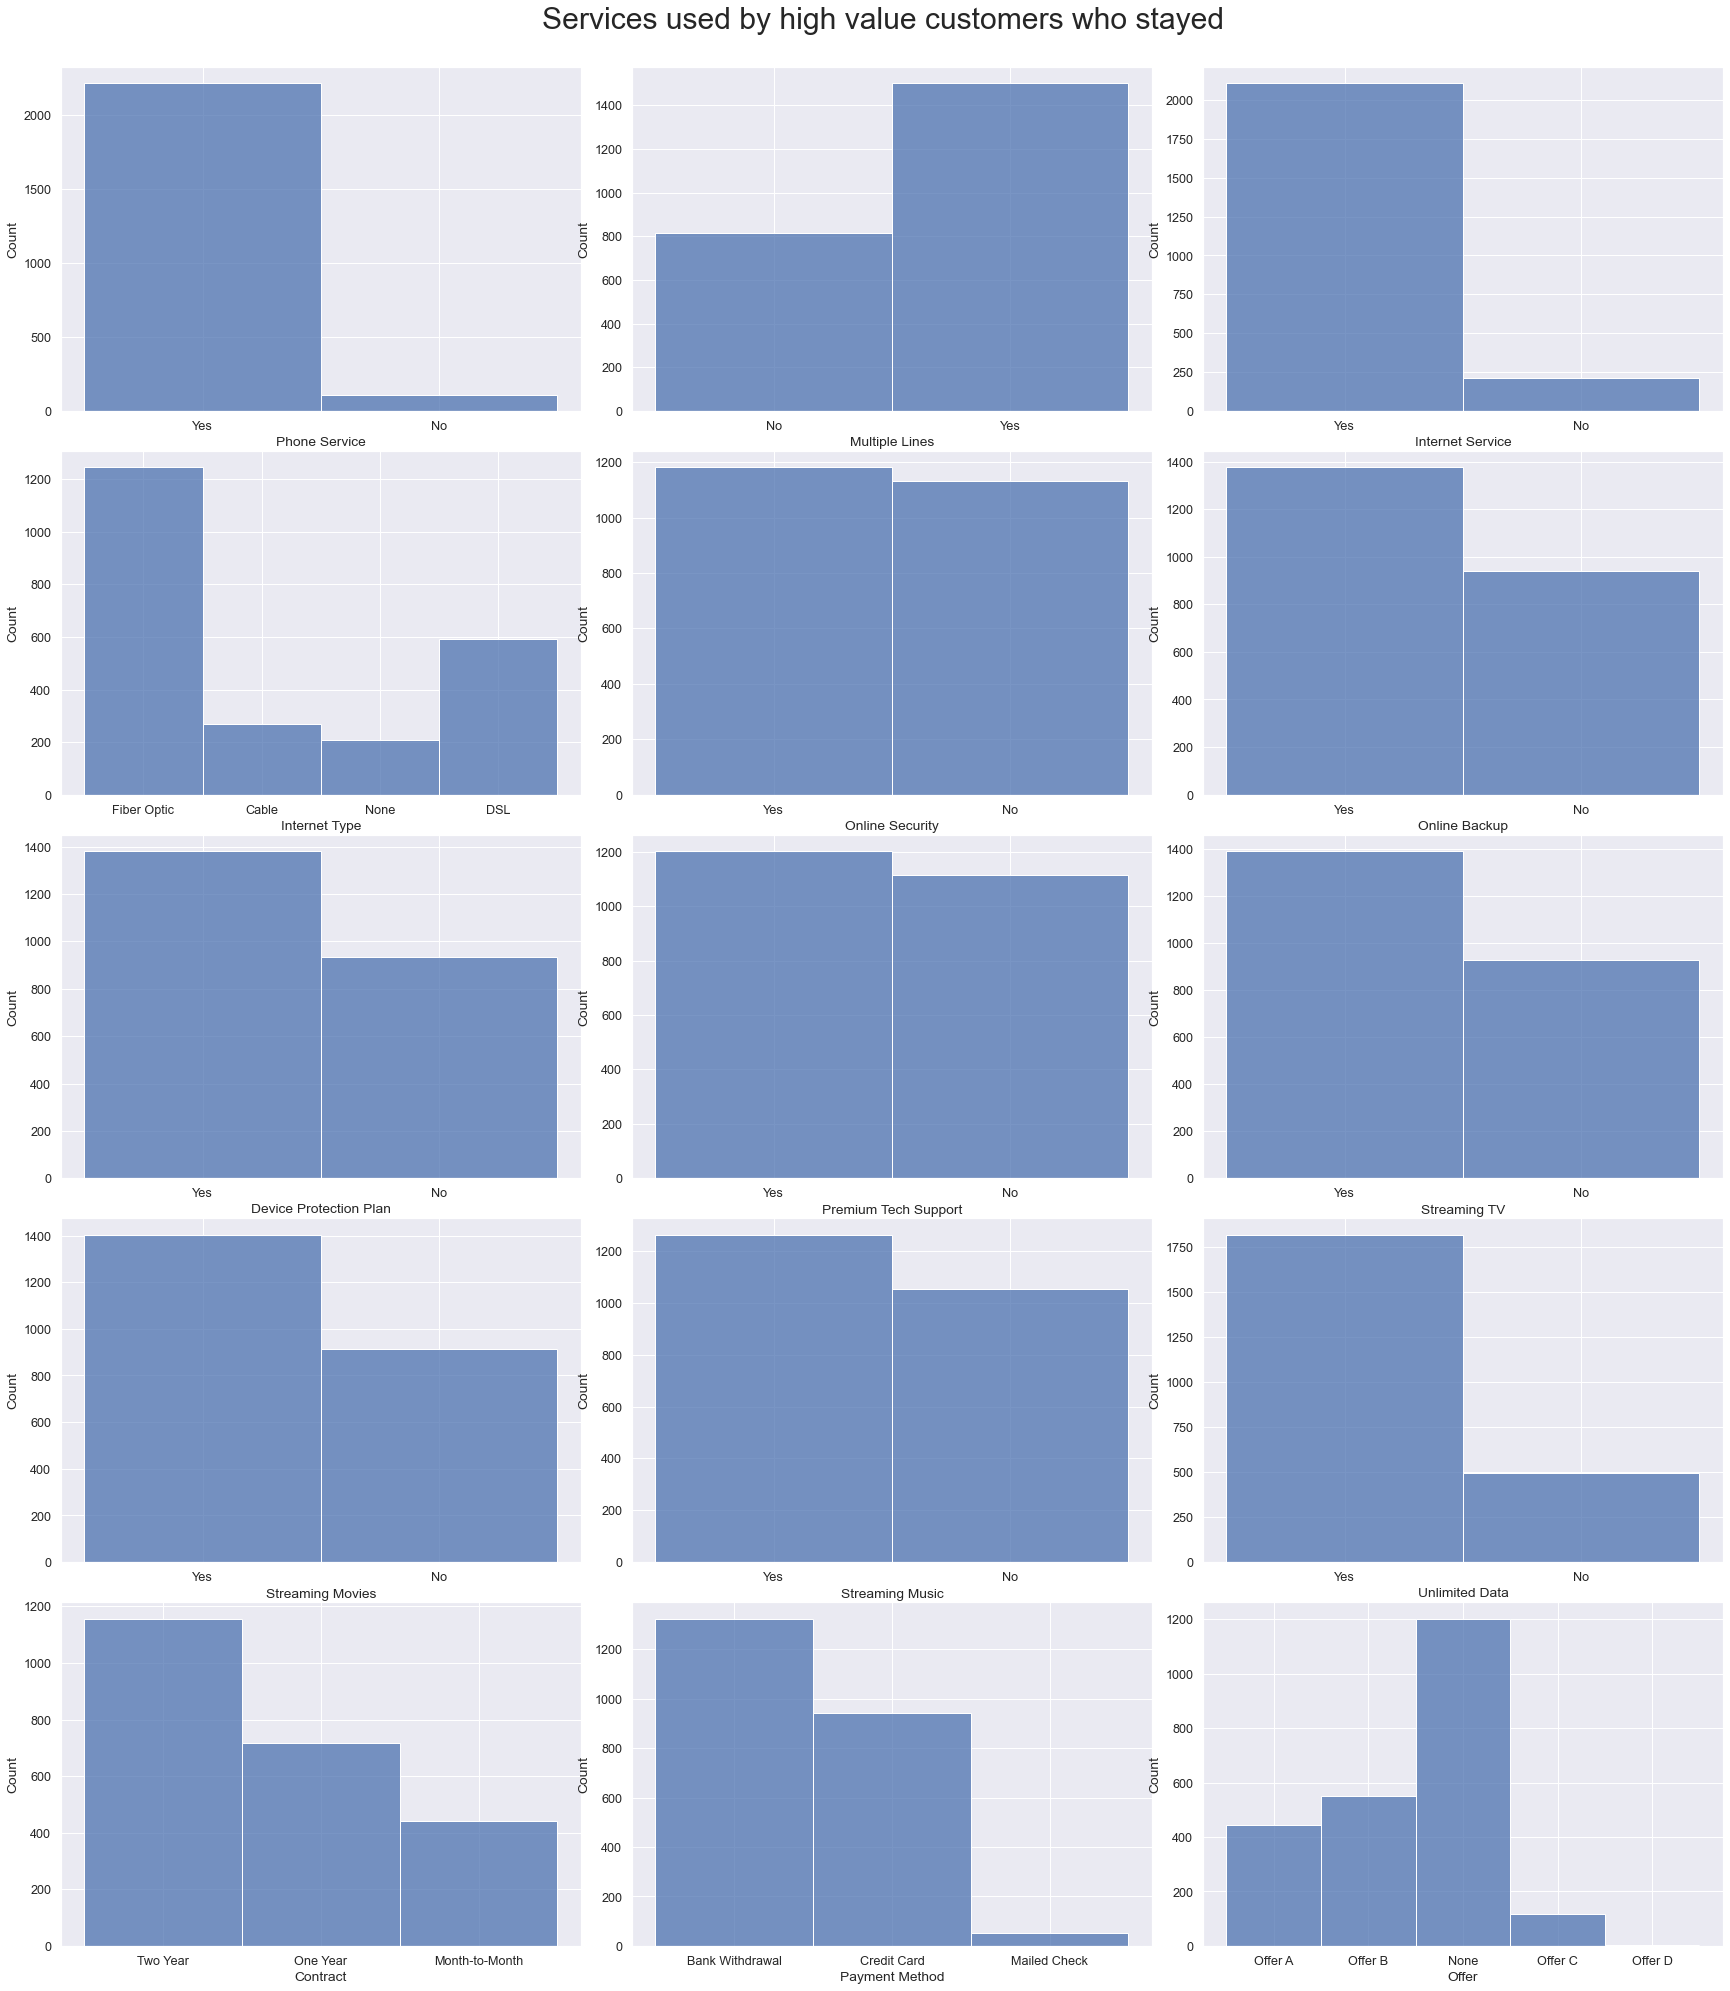

In [ ]:
fig, ax = plt.subplots(5,3, figsize=(24,28))
plt.suptitle('Services used by high value customers who stayed',fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(high_value_stay['Phone Service'], ax=ax[0,0]) 
sns.histplot(high_value_stay['Multiple Lines'], bins = 20, ax=ax[0,1]) 
sns.histplot(high_value_stay['Internet Service'], bins = 20, ax=ax[0,2]) 
sns.histplot(high_value_stay['Internet Type'], bins = 20, ax=ax[1,0]) 
sns.histplot(high_value_stay['Online Security'], bins = 20, ax=ax[1,1])
sns.histplot(high_value_stay['Online Backup'], bins = 20, ax=ax[1,2])
sns.histplot(high_value_stay['Device Protection Plan'], bins = 20, ax=ax[2,0]) 
sns.histplot(high_value_stay['Premium Tech Support'], bins = 20, ax=ax[2,1]) 
sns.histplot(high_value_stay['Streaming TV'], bins = 20, ax=ax[2,2])
sns.histplot(high_value_stay['Streaming Movies'], bins = 20, ax=ax[3,0]) 
sns.histplot(high_value_stay['Streaming Music'], bins = 20, ax=ax[3,1]) 
sns.histplot(high_value_stay['Unlimited Data'], bins = 20, ax=ax[3,2])
sns.histplot(high_value_stay['Contract'], bins = 20, ax=ax[4,0]) 
sns.histplot(high_value_stay['Payment Method'], bins = 20, ax=ax[4,1])
sns.histplot(high_value_stay['Offer'], bins = 20, ax=ax[4,2])  

<AxesSubplot:xlabel='Total Extra Data Charges', ylabel='Count'>

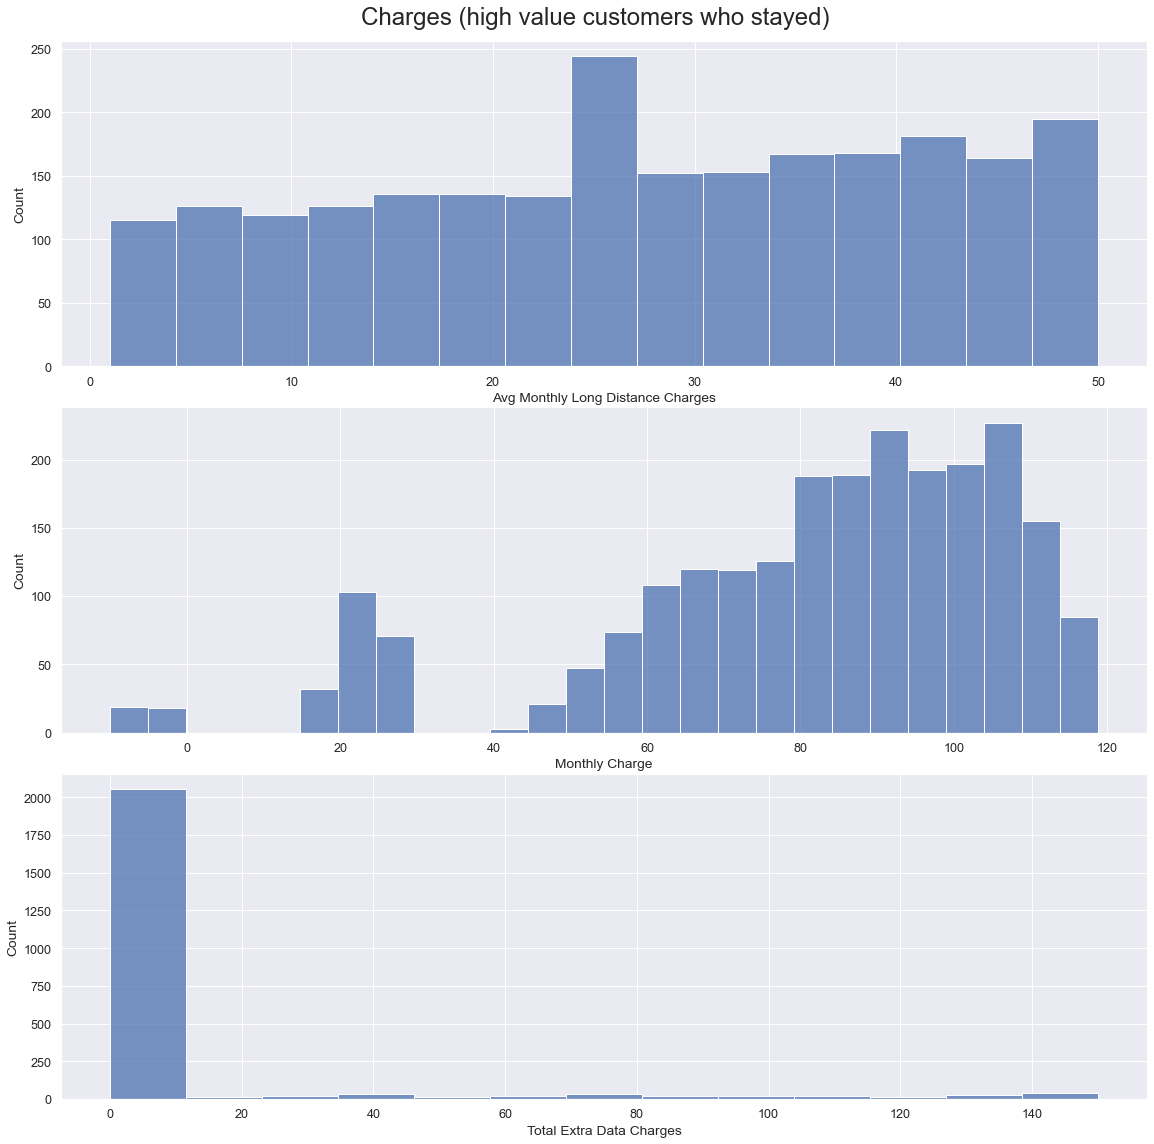

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(16,16))
plt.suptitle('Charges (high value customers who stayed)',fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(high_value_stay['Avg Monthly Long Distance Charges'], ax=ax[0]) 
sns.histplot(high_value_stay['Monthly Charge'], ax=ax[1]) 
sns.histplot(high_value_stay['Total Extra Data Charges'], ax=ax[2])
 

## Just joined customers

In [ ]:
df2 = df.copy()
df2 = df2.drop(['Customer ID', 'City', 'Married',
       'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Paperless Billing'],axis=1)

In [ ]:
joined_df = pd.DataFrame((df2[df2['Customer Status'] == 'Joined']))

joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 17 to 7040
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             454 non-null    object 
 1   Age                                454 non-null    int64  
 2   Number of Dependents               454 non-null    int64  
 3   Tenure in Months                   454 non-null    int64  
 4   Offer                              454 non-null    object 
 5   Phone Service                      454 non-null    object 
 6   Avg Monthly Long Distance Charges  454 non-null    float64
 7   Multiple Lines                     454 non-null    object 
 8   Internet Service                   454 non-null    object 
 9   Internet Type                      454 non-null    object 
 10  Avg Monthly GB Download            454 non-null    float64
 11  Online Security                    454 non-null    objec

In [ ]:
joined_df.describe()

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,42.870044,0.361233,1.720264,24.428876,25.774389,42.775991,79.292731,0.238656,2.378855,38.125991,119.558921
std,14.917827,0.869850,0.818486,13.595804,15.479564,24.612329,67.286088,2.749229,9.655299,33.708099,89.466565
min,19.000000,0.000000,1.000000,1.150000,2.000000,-8.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,31.000000,0.000000,1.000000,13.160000,17.000000,20.162500,25.250000,0.000000,0.000000,11.187500,56.970000
50%,42.000000,0.000000,1.000000,25.420517,26.189958,43.975000,51.425000,0.000000,0.000000,30.680000,91.095000
75%,54.000000,0.000000,2.000000,36.007500,26.189958,64.350000,107.212500,0.000000,0.000000,51.495000,166.240000
max,80.000000,5.000000,3.000000,49.910000,85.000000,107.950000,335.750000,38.840000,70.000000,148.890000,456.100000


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Count'>

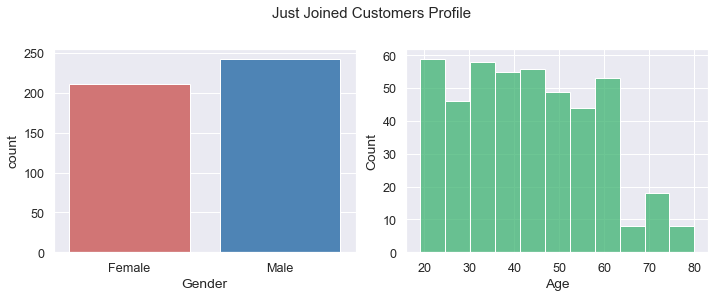

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.suptitle('Just Joined Customers Profile',fontsize=15)
fig.tight_layout()


sns.countplot(joined_df['Gender'], ax=ax[0], palette=['#e06666', '#3d85c6']) 
sns.histplot(joined_df['Age'], ax=ax[1],color='mediumseagreen')

<AxesSubplot:xlabel='Offer', ylabel='Count'>

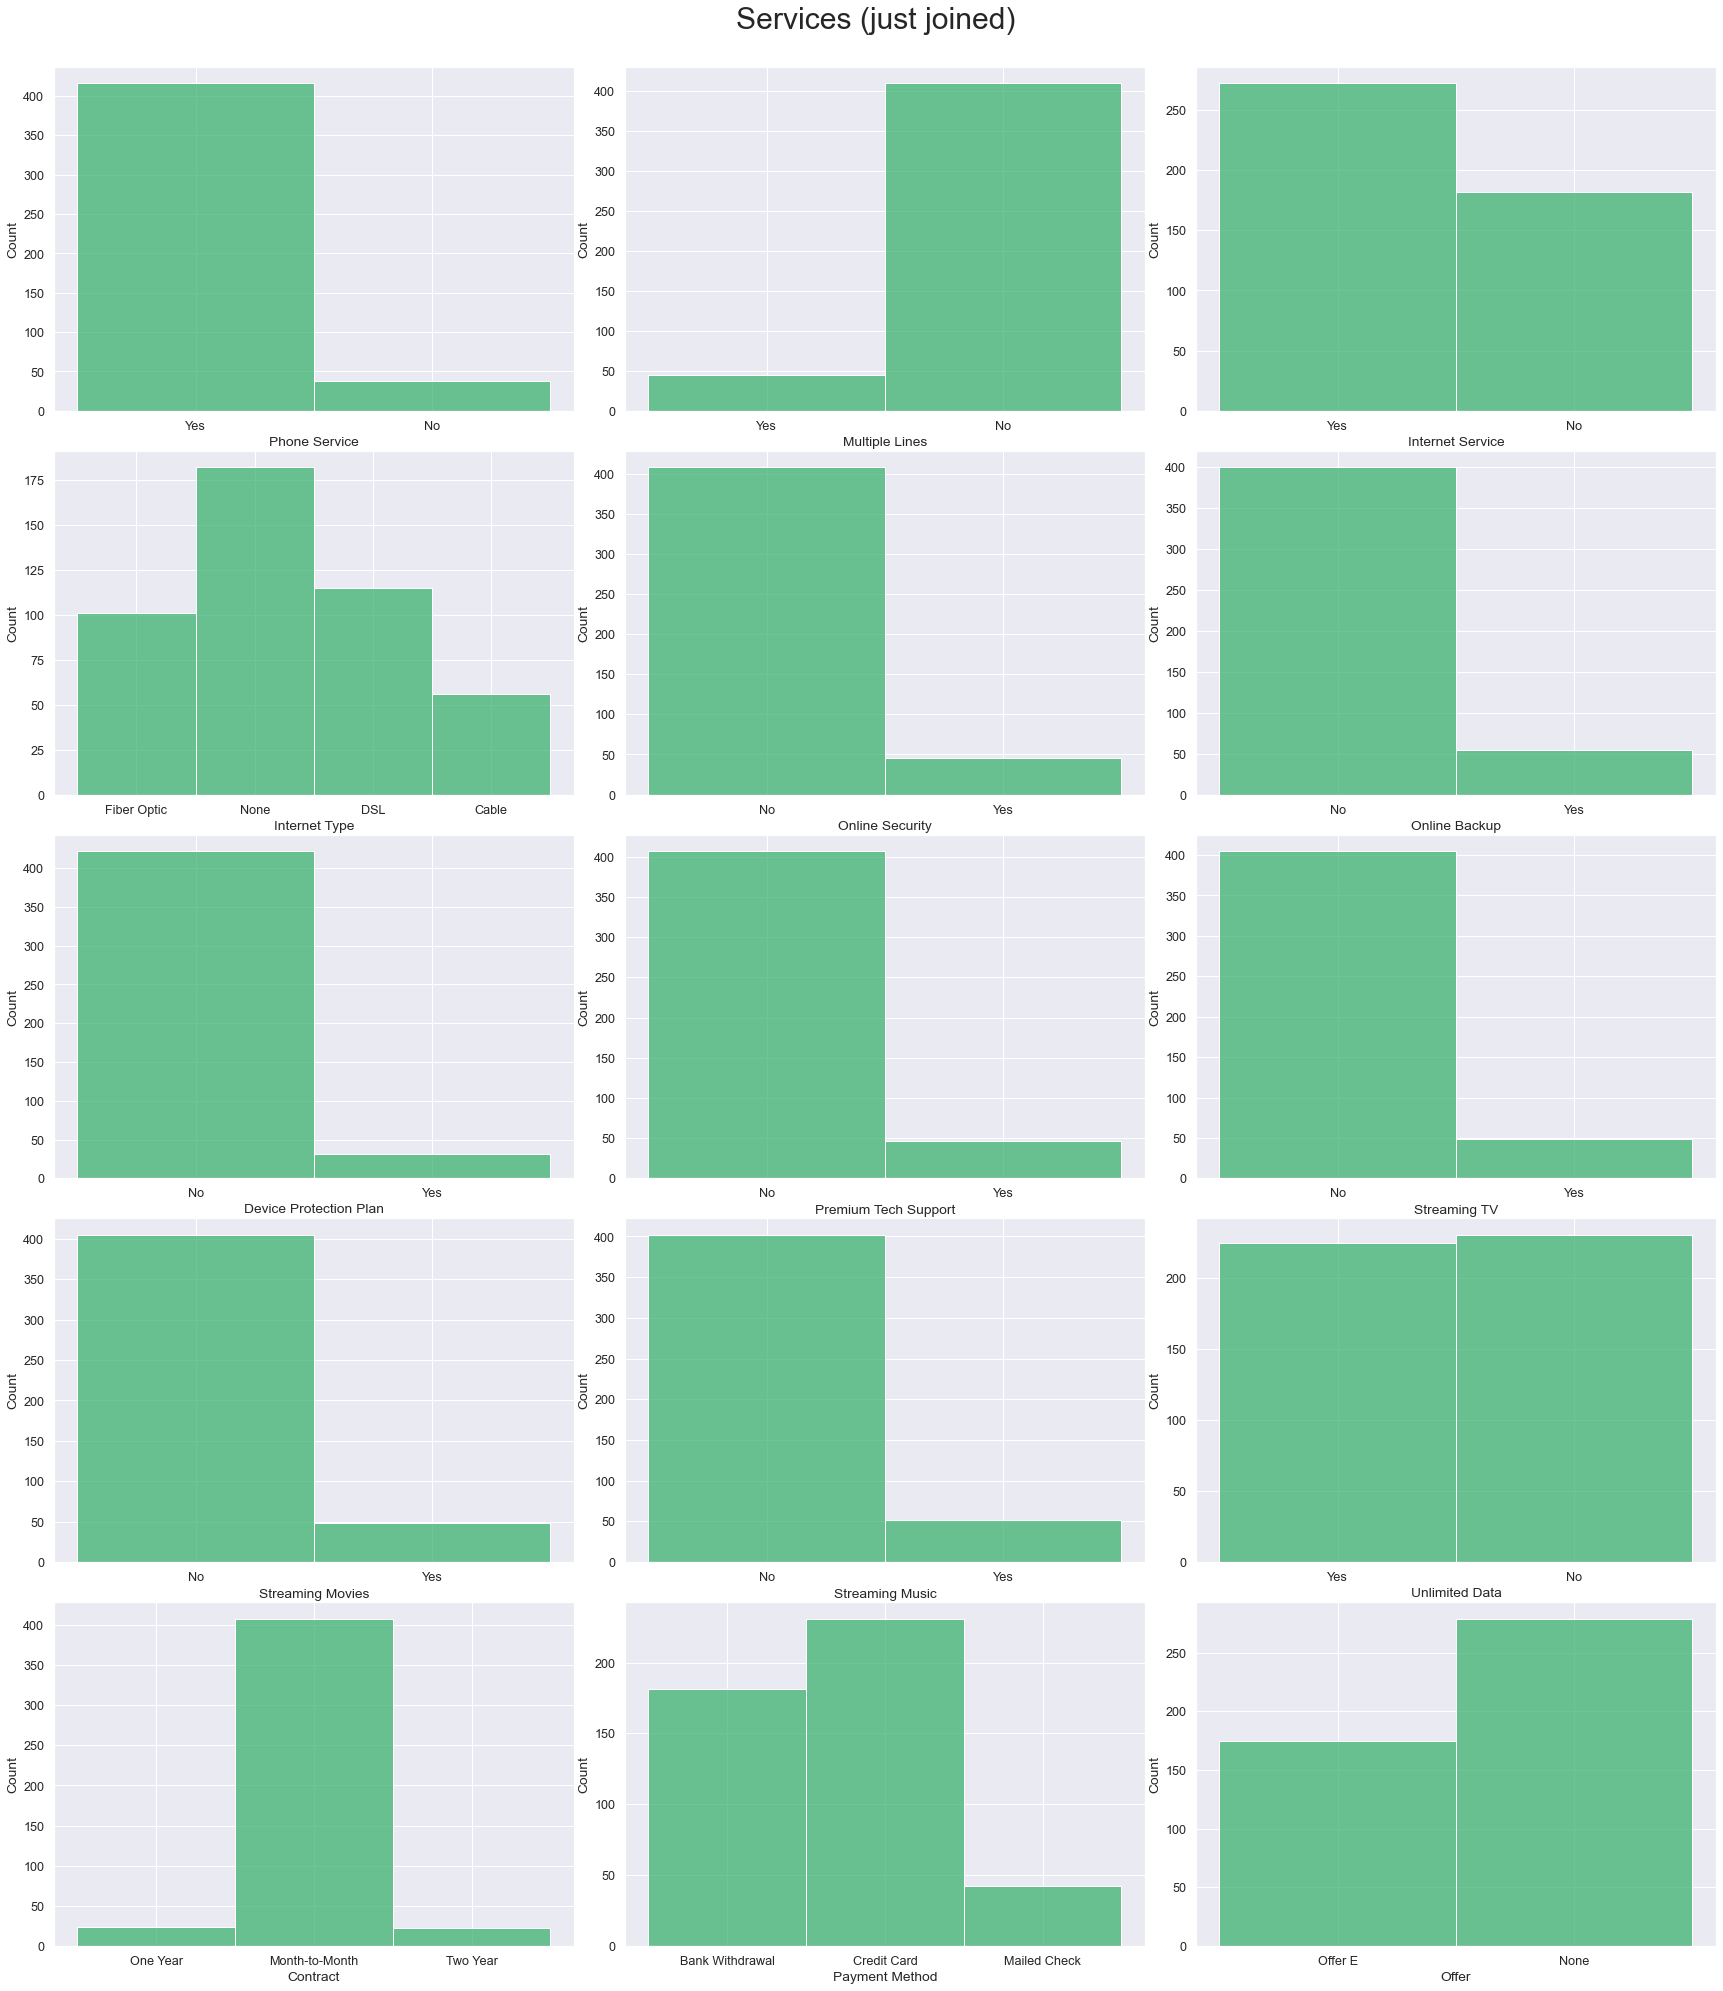

In [ ]:
fig, ax = plt.subplots(5,3, figsize=(24,28))
plt.suptitle('Services (just joined)',fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(joined_df['Phone Service'], ax=ax[0,0], color='mediumseagreen') 
sns.histplot(joined_df['Multiple Lines'], bins = 20, ax=ax[0,1], color='mediumseagreen') 
sns.histplot(joined_df['Internet Service'], bins = 20, ax=ax[0,2], color='mediumseagreen') 
sns.histplot(joined_df['Internet Type'], bins = 20, ax=ax[1,0], color='mediumseagreen') 
sns.histplot(joined_df['Online Security'], bins = 20, ax=ax[1,1], color='mediumseagreen')
sns.histplot(joined_df['Online Backup'], bins = 20, ax=ax[1,2], color='mediumseagreen')
sns.histplot(joined_df['Device Protection Plan'], bins = 20, ax=ax[2,0], color='mediumseagreen') 
sns.histplot(joined_df['Premium Tech Support'], bins = 20, ax=ax[2,1], color='mediumseagreen') 
sns.histplot(joined_df['Streaming TV'], bins = 20, ax=ax[2,2], color='mediumseagreen')
sns.histplot(joined_df['Streaming Movies'], bins = 20, ax=ax[3,0], color='mediumseagreen') 
sns.histplot(joined_df['Streaming Music'], bins = 20, ax=ax[3,1], color='mediumseagreen') 
sns.histplot(joined_df['Unlimited Data'], bins = 20, ax=ax[3,2], color='mediumseagreen')
sns.histplot(joined_df['Contract'], bins = 20, ax=ax[4,0], color='mediumseagreen') 
sns.histplot(joined_df['Payment Method'], bins = 20, ax=ax[4,1], color='mediumseagreen')
sns.histplot(joined_df['Offer'], bins = 20, ax=ax[4,2], color='mediumseagreen')  

<AxesSubplot:xlabel='Total Extra Data Charges', ylabel='Count'>

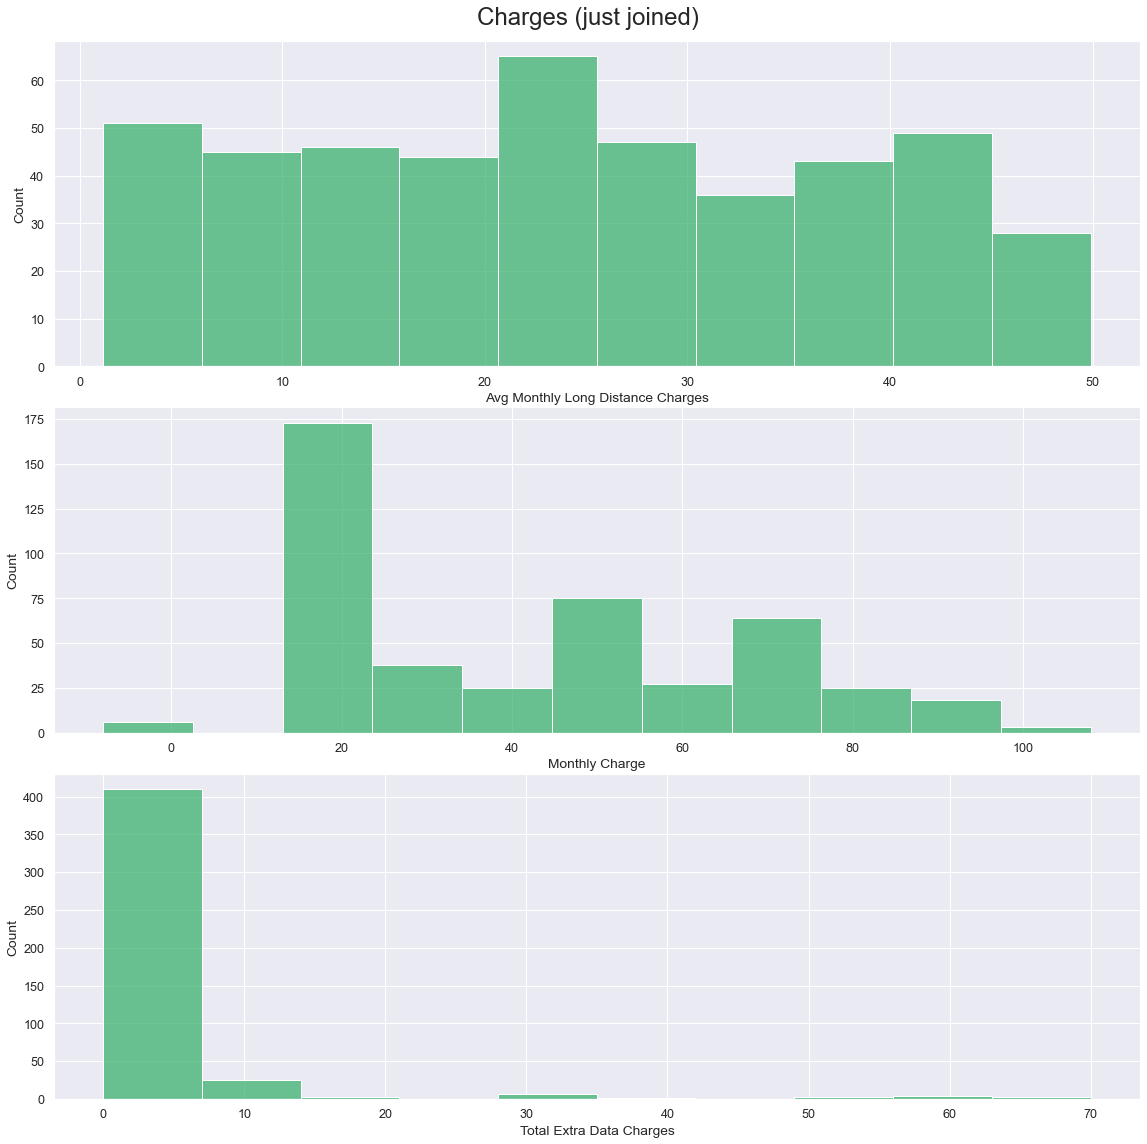

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(16,16))
plt.suptitle('Charges (just joined)',fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.95)


sns.histplot(joined_df['Avg Monthly Long Distance Charges'], ax=ax[0], color='mediumseagreen') 
sns.histplot(joined_df['Monthly Charge'], ax=ax[1],color='mediumseagreen') 
sns.histplot(joined_df['Total Extra Data Charges'], ax=ax[2],color='mediumseagreen')
 

# Conclusion


- Customers who used month to month contract are most likely to churn. There is a probability that it is easier to churn within months than yearly subcriptions.
- Many customers stated that their reason to churn is because their monthly charges are high. This statement is also correct based on the analysis
- High value customers tend to use various services 
- Customers who just joined are mostly in younger age, and joined only for phone services and internet for their phone (not with fiber optic etc). Their monthly charge is also much lower than those who churned.
